# Label_Stats.ipynb

Compute summary statistics about hand-labeled data

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Input file locations

In [2]:
# TODO: fix spelling error "auditted" -> "audited"
data_dir = os.path.join("..", "inter_annotator_agreement", "human_labels_auditted")

# Files with labels in the gold standard 
_CONLL_2_IN_GOLD_FILE =           os.path.join(data_dir, "CoNLL_2_in_gold.csv")
_CONLL_3_IN_GOLD_FILE =           os.path.join(data_dir, "CoNLL_3_in_gold.csv")
_CONLL_3_TRAIN_IN_GOLD_FILE =     os.path.join(data_dir, "CoNLL_3_train_in_gold.csv")
_CONLL_4_IN_GOLD_FILE =           os.path.join(data_dir, "CoNLL_4_in_gold.csv")
_CONLL_4_TRAIN_IN_GOLD_FILE =     os.path.join(data_dir, "CoNLL_4_train_in_gold.csv")

# Files with labels not in the gold standard
_CONLL_2_NOT_IN_GOLD_FILE =       os.path.join(data_dir, "CoNLL_2_not_in_gold.csv")
_CONLL_3_NOT_IN_GOLD_FILE =       os.path.join(data_dir, "CoNLL_3_not_in_gold.csv")
_CONLL_3_TRAIN_NOT_IN_GOLD_FILE = os.path.join(data_dir, "CoNLL_3_train_not_in_gold.csv")
_CONLL_4_NOT_IN_GOLD_FILE       = os.path.join(data_dir, "CoNLL_4_not_in_gold.csv")
_CONLL_4_TRAIN_NOT_IN_GOLD_FILE = os.path.join(data_dir, "CoNLL_4_train_not_in_gold.csv")

# Optionally output figures generated
save_figures = True
figure_dir = os.path.join(data_dir, "label_stats_images")
if save_figures and not os.path.exists(figure_dir):
    os.mkdir(figure_dir)

## Read labels into dataframes

In [3]:
# Constants that govern reading CSV files
Excel_encoding = "Windows-1252"  # Excel's unchangeable default CSV encoding

# Column types in a file of examples not in the gold standard
_NOT_IN_GOLD_DTYPES = {
    "num_teams": "Int64",
    "num_models": "Int64", 
    "fold"      : "string", 
    "doc_offset" : "Int64",
    "model_span": "string",
    "error_type": "string", 
    "corpus_span": "string",
    "corpus_ent_type": "string",
    "correct_span": "string", 
}
_NOT_IN_GOLD_DROP_COLS = ["time_started", "time_stopped", "time_elapsed"]

_IN_GOLD_DTYPES = {
    "num_teams": "Int64",
    "num_models": "Int64", 
    "fold"      : "string", 
    "doc_offset" : "Int64",
    "corpus_span": "string",
    "error_type": "string", 
    "corpus_ent_type": "string",
    "correct_span": "string", 
}
_IN_GOLD_DROP_COLS = ["time_started", "time_stopped", "time_elapsed"]
utf_8_encoding =  "utf-8"

def read_star_gold_df(file_name, dtypes, drop_cols, encoding):
    result = (
        pd
        .read_csv(file_name, dtype=dtypes, encoding=encoding)
        .drop(columns=drop_cols)
    )
    #homogenize "num_teams" with "num_models" label to allow combination of the two datasets 
    if "num_teams" in result.columns: 
        result = result.rename(columns = {"num_teams" : "num_models"})
    if "verified" in result.columns: 
        result = result.drop(columns = "verified")
    return result[~result["error_type"].isna()].copy() 

def read_not_in_gold_df(file_name, encoding):
    result = read_star_gold_df(file_name, _NOT_IN_GOLD_DTYPES, _NOT_IN_GOLD_DROP_COLS, encoding )
    result["subset"] = "not_in_gold"
    return result

def read_in_gold_df(file_name, encoding):
    result = read_star_gold_df(file_name, _IN_GOLD_DTYPES, _IN_GOLD_DROP_COLS, encoding) # maybe process a little to add "model span" I dont think I use it though so for now I wont
    result["subset"] = "in_gold"
    return result
    


In [4]:
conll_2_not_in_gold_df = read_not_in_gold_df(_CONLL_2_NOT_IN_GOLD_FILE, encoding=utf_8_encoding)

conll_3_not_in_gold_df = pd.concat([read_not_in_gold_df(_CONLL_3_NOT_IN_GOLD_FILE, encoding=Excel_encoding),
                                   read_not_in_gold_df(_CONLL_3_TRAIN_NOT_IN_GOLD_FILE, encoding=Excel_encoding)])

conll_4_not_in_gold_df = pd.concat([read_not_in_gold_df(_CONLL_4_NOT_IN_GOLD_FILE, encoding=Excel_encoding),
                                   read_not_in_gold_df(_CONLL_4_TRAIN_NOT_IN_GOLD_FILE, encoding=Excel_encoding)])

conll_2_in_gold_df = read_in_gold_df(_CONLL_2_IN_GOLD_FILE, encoding=utf_8_encoding)

conll_3_in_gold_df = pd.concat([read_in_gold_df(_CONLL_3_IN_GOLD_FILE, encoding=Excel_encoding),
                                read_in_gold_df(_CONLL_3_TRAIN_IN_GOLD_FILE, encoding=Excel_encoding)])

conll_4_in_gold_df = pd.concat([read_in_gold_df(_CONLL_4_IN_GOLD_FILE, encoding=Excel_encoding),
                                read_in_gold_df(_CONLL_4_TRAIN_IN_GOLD_FILE, encoding=Excel_encoding)])

# tag with sources :
conll_2_not_in_gold_df['conll_2'] = True 
conll_3_not_in_gold_df["conll_3"] = True
conll_4_not_in_gold_df["conll_4"] = True

conll_2_in_gold_df["conll_2"] = True
conll_3_in_gold_df["conll_3"] = True
conll_4_in_gold_df["conll_4"] = True

In [5]:
conll_4_not_in_gold_df

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_4
0,16,dev,0,"[2225, 2235): 'ex-England'",LOC,None,"[2225, 2235): 'ex-England'",MISC,<NA>,NaN,NaN,not_in_gold,True
1,14,dev,2,"[189, 193): 'Test'",ORG,None,"[189, 218): 'Test and County Cricket Board'",ORG,<NA>,NaN,NaN,not_in_gold,True
2,13,dev,2,"[614, 629): 'Duke of Norfolk'",ORG,None,"[614, 634): 'Duke of Norfolk's XI'",<NA>,<NA>,NaN,NaN,not_in_gold,True
3,17,dev,2,"[760, 765): 'Leeds'",LOC,Tag,<NA>,ORG,<NA>,NaN,NaN,not_in_gold,True
4,12,dev,5,"[45, 53): 'UNDER-21'",MISC,None,<NA>,<NA>,<NA>,NaN,NaN,not_in_gold,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,16,train,940,"[52, 57): 'STYLE'",LOC,None,<NA>,<NA>,<NA>,NaN,NaN,not_in_gold,True
591,17,train,944,"[1030, 1042): 'South Africa'",LOC,Sentence,"[1030, 1035): 'South'",LOC,"[1030, 1042): 'South Africa'",LOC,"Sentence boundary between ""South"" and ""Africa""",not_in_gold,True
592,17,train,944,"[1030, 1042): 'South Africa'",LOC,Sentence,"[1036, 1042): 'Africa'",LOC,"[1030, 1042): 'South Africa'",LOC,"Sentence boundary between ""South"" and ""Africa""",not_in_gold,True
593,17,train,944,"[415, 427): 'South Africa'",LOC,Sentence,"[415, 420): 'South'",LOC,"[415, 427): 'South Africa'",LOC,"Sentence boundary between ""South"" and ""Africa""",not_in_gold,True


In [6]:
conll_3_not_in_gold_df[(conll_3_not_in_gold_df["fold"] == "train")
                       & ~(conll_3_not_in_gold_df["num_models"].isna())
                       & (conll_3_not_in_gold_df["error_type"] != "None")]

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_3
2,17,train,6,"[121, 137): 'Toronto Dominion'",LOC,Tag,<NA>,PER,<NA>,ORG,TD Bank,not_in_gold,True
5,17,train,29,"[454, 468): 'Phil Mickelson'",PER,Sentence,"[454, 458): 'Phil'",<NA>,<NA>,NaN,Sentence boundary between first and last name,not_in_gold,True
6,17,train,29,"[454, 468): 'Phil Mickelson'",PER,Sentence,"[459, 468): 'Mickelson'",<NA>,<NA>,NaN,Sentence boundary between first and last name,not_in_gold,True
7,17,train,29,"[762, 774): 'Mark O'Meara'",PER,Sentence,"[762, 766): 'Mark'",<NA>,<NA>,NaN,Sentence boundary between first and last name,not_in_gold,True
8,17,train,29,"[762, 774): 'Mark O'Meara'",PER,Sentence,"[767, 774): 'O'Meara'",<NA>,<NA>,NaN,Sentence boundary between first and last name,not_in_gold,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,14,train,698,"[1994, 2008): 'Crystal Palace'",LOC,Tag,<NA>,ORG,<NA>,NaN,The world's firstï¿½Boy Scout Rallyï¿½was held...,not_in_gold,True
354,14,train,832,"[419, 427): 'EUROLIRA'",MISC,Tag,<NA>,ORG,<NA>,NaN,Futures contract on exchange rate,not_in_gold,True
356,14,train,872,"[221, 228): 'CHICAGO'",LOC,Both,"[221, 239): 'CHICAGO AREA MILLS'",MISC,<NA>,NaN,NaN,not_in_gold,True
360,14,train,893,"[118, 130): 'Wyche Fowler'",PER,Span,"[124, 130): 'Fowler'",<NA>,"[21, 24): 'T&N'",ORG,NaN,not_in_gold,True


In [7]:
conll_3_in_gold_df[(conll_3_in_gold_df["fold"] == "train")
                       & ~(conll_3_in_gold_df["num_models"].isna())
                       & (conll_3_in_gold_df["error_type"] != "None")]

,num_models,fold,doc_offset,corpus_span,corpus_ent_type,error_type,correct_span,correct_ent_type,notes,subset,conll_3
3,0,train,6,"[121, 137): 'Toronto Dominion'",PER,Tag,<NA>,ORG,TD Bank,in_gold,True
6,5,train,7,"[289, 291): '3M'",ORG,Wrong,<NA>,NaN,3 Months,in_gold,True
11,4,train,11,"[485, 491): 'Rajavi'",MISC,Tag,<NA>,PER,Massoud Rajavi,in_gold,True
17,0,train,25,"[141, 151): 'mid-Norway'",MISC,Tag,<NA>,LOC,"Could also be considered a tokenization error,...",in_gold,True
21,0,train,29,"[454, 458): 'Phil'",PER,Sentence,"[454, 468): 'Phil Mickelson'",PER,NaN,in_gold,True
...,...,...,...,...,...,...,...,...,...,...,...
922,4,train,939,"[19, 24): 'WALES'",LOC,Tag,<NA>,ORG,Soccer team,in_gold,True
928,0,train,944,"[1030, 1035): 'South'",LOC,Sentence,"[1030, 1042): 'South Africa'",LOC,NaN,in_gold,True
929,0,train,944,"[1036, 1042): 'Africa'",LOC,Sentence,"[1030, 1042): 'South Africa'",LOC,NaN,in_gold,True
930,1,train,944,"[415, 420): 'South'",LOC,Sentence,"[415, 427): 'South Africa'",LOC,NaN,in_gold,True


In [8]:
print("CoNLL 2 Not in gold error types", conll_2_not_in_gold_df["error_type"].unique())
print("\nCoNLL 3 Not in gold error types", conll_3_not_in_gold_df["error_type"].unique())
print("\nCoNLL 4 Not in gold error types", conll_4_not_in_gold_df["error_type"].unique())

print("\nCoNLL 2 In gold error types", conll_2_in_gold_df["error_type"].unique())
print("\nCoNLL 3 In gold error types", conll_3_in_gold_df["error_type"].unique())
print("\nCoNLL 4 In gold error types", conll_4_in_gold_df["error_type"].unique())

CoNLL 2 Not in gold error types <StringArray>
['Sentence', 'None', 'Wrong', 'Token', 'Tag', 'Span', 'Both', 'Missing']
Length: 8, dtype: string

CoNLL 3 Not in gold error types <StringArray>
['None', 'Tag', 'Sentence', 'Missing', 'Token', 'Span', 'Wrong', 'Both']
Length: 8, dtype: string

CoNLL 4 Not in gold error types <StringArray>
['None', 'Tag', 'Both', 'Span', 'Sentence', 'Wrong', 'Missing', 'Token']
Length: 8, dtype: string

CoNLL 2 In gold error types <StringArray>
['None', 'Wrong', 'Token', 'Sentence', 'Span', 'Tag', 'Missing']
Length: 7, dtype: string

CoNLL 3 In gold error types <StringArray>
['None', 'Tag', 'Sentence', 'Token', 'Span', 'Wrong', 'Missing', 'Both']
Length: 8, dtype: string

CoNLL 4 In gold error types <StringArray>
['None', 'Tag', 'Sentence', 'Wrong', 'Token', 'Span', 'Missing', 'PER',
 'Both']
Length: 9, dtype: string


## Fill in blank values

Many fields are left blank during manual labeling because they 
can be inferred from the remaining fields.

In [9]:
def infer_corpus_span_not_in_gold(row):
    if not pd.isna(row["corpus_span"]):
        # Don't override values already present
        return row["corpus_span"]
    elif row["error_type"] in ["None", "Sentence", "Token", "Wrong", "Missing", "Ambiguous"]: 
        # Don't attempt inference for these error types.
        return row["corpus_span"]
    elif pd.isna(row["num_models"]):
        # Not from a team's results
        return row["corpus_span"]
    elif row["error_type"] == "Tag":
        return row["model_span"]
    else:
        raise ValueError(f"Can't infer corpus_span for row \n{row}")
        
def infer_correct_span_not_in_gold(row):
    if not pd.isna(row["correct_span"]):
        # Don't override values already present
        return row["correct_span"]
    elif row["error_type"] in ["None", "Wrong", "Ambiguous"]:
        # Don't attempt inference for these error types.
        return row["correct_span"]
    elif row["error_type"] == "Tag":
        #in this, case the original span was correct, just the tag needs changing
        return row["corpus_span"]
    elif pd.isna(row["num_models"]):
        # Not from a team's results
        return row["correct_span"]
    elif row["error_type"] in ["Span", "Sentence", "Token", "Both", "Missing"]:
        return row["model_span"]
    else:
        raise ValueError(f"Can't infer correct_span for row:\n{row}")
    
def infer_correct_ent_type_not_in_gold(row):
    if not pd.isna(row["correct_ent_type"]):
        # Don't override values already present
        return row["correct_ent_type"]
    elif row["error_type"] in ["None", "Sentence", "Token", "Wrong", "Span", "Ambiguous"]:
        # Don't attempt inference for these error types.
        return row["correct_ent_type"]
    elif pd.isna(row["num_models"]):
        # Not from a team's results
        return row["correct_ent_type"]
    elif row["error_type"] in ["Tag", "Both", "Missing"]:
        return row["model_ent_type"]
    else:
        raise ValueError(f"Can't infer correct_ent_type for row:\n{row}")
    

def infer_blanks_not_in_gold(df):
    ret = df.copy()
    ret["corpus_span"] = [infer_corpus_span_not_in_gold(r) for _, r in ret.iterrows()]
    ret["correct_span"] = [infer_correct_span_not_in_gold(r) for _, r in ret.iterrows()]
    ret["correct_ent_type"] = [infer_correct_ent_type_not_in_gold(r) for _, r in ret.iterrows()]
    return ret

#### now for the in_gold inferences: we can't quite do as much but we can try 
    #i'll have to go back over this when I have actual data to crossreference with 

def infer_correct_span_in_gold(row): 
    if not pd.isna(row["correct_span"]):
        #do nothing if correct span already exists
        return row["correct_span"]
    elif row["error_type"] in  ['Sentence', 'Token', 'Span', 'Wrong', 'Both']:
        # don't attempt to inference for these values 
        return row["correct_span"]
    elif row["error_type"] in [ "Tag", "None" ]:
        return row["corpus_span"] 
    elif pd.isna(row["num_models"]):
        # Not from a team's results
        return row["correct_span"]
    else:
        raise ValueError(f"Can't infer correct_span for row:\n{row}")


def infer_correct_ent_type_in_gold(row):
    if not pd.isna(row["correct_ent_type"]):
        # Don't override values already present
        return row["correct_ent_type"]
    elif pd.isna(row["num_models"]):
        # Not from a team's results. can't really inference. 
        return row["correct_ent_type"]
    elif row["error_type"] in ['Tag', 'Sentence', 'Token', 'Wrong', 'Both']:
        #dont attempt inference for these model types 
        return row["correct_ent_type"]
    elif row["error_type"] in ["None", "Span"]:
        return row["corpus_ent_type"]
    else:
        raise ValueError(f"Can't infer correct_span for row:\n{row}")
def infer_blanks_in_gold(df):
    ret = df.copy()
    ret["correct_span"] = [infer_correct_span_in_gold(r) for _, r in ret.iterrows()]
    ret["correct_ent_type"] = [infer_correct_ent_type_in_gold(r) for _, r in ret.iterrows()]
    return ret

conll_2_not_in_gold_full = infer_blanks_not_in_gold(conll_2_not_in_gold_df)
conll_3_not_in_gold_full = infer_blanks_not_in_gold(conll_3_not_in_gold_df)
conll_4_not_in_gold_full = infer_blanks_not_in_gold(conll_4_not_in_gold_df)

conll_2_in_gold_full = infer_blanks_in_gold(conll_2_in_gold_df)
conll_3_in_gold_full = infer_blanks_in_gold(conll_3_in_gold_df)
conll_4_in_gold_full = infer_blanks_in_gold(conll_4_in_gold_df)

In [10]:
#check for data that cannot be used, due to mis-entering
def find_bad_data(df):
    ret = df[df["fold"].isna() | df["doc_offset"].isna()]
    return ret
bad_NG_conll_2 = find_bad_data(conll_2_not_in_gold_full)
bad_NG_conll_3 = find_bad_data(conll_3_not_in_gold_full)
bad_NG_conll_4 = find_bad_data(conll_4_not_in_gold_full)

bad_IG_conll_2 = find_bad_data(conll_2_in_gold_full)
bad_IG_conll_3 = find_bad_data(conll_3_in_gold_full)
bad_IG_conll_4 = find_bad_data(conll_4_in_gold_full)

bad_total = (
    bad_NG_conll_2
    .append(bad_NG_conll_3)
    .append(bad_NG_conll_4)
    .append(bad_IG_conll_2)
    .append(bad_IG_conll_3)
    .append(bad_IG_conll_4)
)
display(bad_total)

# if if bad_total.count() > 0:
#   raise ValueError("Found Data with no fold or document numbers")

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_2,conll_3,conll_4


## Eliminate duplicates

Use the values we just imputed to identify instances of the same span being
fixed twice.

In [92]:
def combine_eliminate_duplicate_entries(df_in_a, df_in_b, not_in_gold=False, cross_subset=False, remove_duped_outputs = True):
    # Combines two datasets, labels and removes duplicates
    # not_in_gold - should be true if both data sets are from the not_in_gold subset, false otherwise 
    # cross_subset - should be true if the data sets are from two different subsets (i.e. one is in gold and the other is not in gold)
        # this is used for the correct label of duplicates. 
    # side effect: rearranges order of data 
    df_in = df_in_a.append(df_in_b, ignore_index= True)
    #sort so that when duplicates are removed, the entry with the most "hits" is preferred
    df_in = df_in.sort_values(by=["num_models_missing"], na_position='last')
    
    #label duplicates
    df_temp = df_in.fillna({"num_models" : np.nan, "corpus_span": "NA","corpus_ent_type":" NA", 
                            "correct_span": "NA"})
    df_duplicated = df_temp.duplicated(["fold", "doc_offset", "corpus_span",
                                        "corpus_ent_type","correct_span"], keep = 'last')    
    if cross_subset:
        df_in.loc[df_duplicated, 'subset'] = "both"
    else:
        df_in.loc[df_duplicated, 'dataset'] = "both"

    df = df_in

    #now, use df_temp to select elements to throw out, normally 
    to_remove  = df_temp.duplicated(["fold", "doc_offset", "error_type", "corpus_span",
                                     "corpus_ent_type", "correct_span"], keep = 'first')
    df_temp = df_temp[~to_remove]
    df_double_counted = df_temp.duplicated(["fold", "doc_offset", "correct_ent_type","correct_span"]) & \
        df_temp['error_type'].isin(['Sentence', 'Token', 'Span', 'Both', 'Missing'])

    ret = (df[(~to_remove)]).copy()
    if remove_duped_outputs: 
        ret = (ret[~df_double_counted]).copy()

    #reorder to improve ease of reading 
    ret.sort_values(by=["fold", "doc_offset","correct_span"], ignore_index = True, inplace=True)

    #if ~cross_subset: 
    if not cross_subset:
        ret.loc[ret['dataset'] == 'both'] = fix_subset_entries(ret.loc[ret['dataset'] == 'both'])
    ret.fillna({'conll_2': False, 'conll_3': False, 'conll_4': False}, inplace=True)
    return ret

def in_df(row, df):
    feilds = ['fold', 'doc_offset', 'correct_span', 'correct_ent_type', 'error_type', 'corpus_span', 'corpus_ent_type' ]
    df_temp = df
    for feild in feilds: 
        df_temp = df_temp[(df_temp[feild].isna() & row.isna()[feild]) | (df_temp[feild] == row[feild])]
        if df_temp.count().max() == 0: return False 
    return True
  
def fix_subset_entries(df_in): 
    df = df_in.copy()
    for i, row in df.iterrows(): 
        df.at[i, "conll_3"] = in_df(row,all_labels_conll_3_not_in_gold) | in_df(row,all_labels_conll_3_in_gold)
        df.at[i, "conll_2"] = in_df(row,all_labels_conll_2_not_in_gold) | in_df(row,all_labels_conll_2_in_gold)
        df.at[i, "conll_4"] = in_df(row,all_labels_conll_4_not_in_gold) 
    return df
    
def clean_data(df_in):
    #removes data that is currently not able to be used (location not avaliable etc.)
    df = df_in.copy()
    ret = df[~df["error_type"].isna()]
    ret = ret[~ret["fold"].isna()]  
    ret = ret[~ret["doc_offset"].isna()]
    return df

#clean data 
all_labels_conll_2_not_in_gold = clean_data(conll_2_not_in_gold_full)
all_labels_conll_3_not_in_gold = clean_data(conll_3_not_in_gold_full)
all_labels_conll_4_not_in_gold = clean_data(conll_4_not_in_gold_full)

all_labels_conll_2_in_gold = clean_data(conll_2_in_gold_full)
all_labels_conll_3_in_gold = clean_data(conll_3_in_gold_full)
all_labels_conll_4_in_gold = clean_data(conll_4_in_gold_full)

#move data to "number of models missing". This alows for more "apples to apples" comparisons
all_labels_conll_2_not_in_gold["num_models_missing"] = (all_labels_conll_2_not_in_gold.num_models - 16) * -1  # number of models used
all_labels_conll_3_not_in_gold["num_models_missing"] = (all_labels_conll_3_not_in_gold.num_models - 17) * -1  # number of models used 
all_labels_conll_4_not_in_gold["num_models_missing"] = (all_labels_conll_4_not_in_gold.num_models - 17) * -1  # number of models used 
all_labels_conll_2_in_gold ["num_models_missing"] = all_labels_conll_2_in_gold.num_models
all_labels_conll_3_in_gold ["num_models_missing"] = all_labels_conll_3_in_gold.num_models
all_labels_conll_4_in_gold ["num_models_missing"] = all_labels_conll_4_in_gold.num_models

all_labels_conll_2_not_in_gold["agreeing_models"] = all_labels_conll_2_not_in_gold.num_models
all_labels_conll_3_not_in_gold["agreeing_models"] = all_labels_conll_3_not_in_gold.num_models
all_labels_conll_4_not_in_gold["agreeing_models"] = all_labels_conll_4_not_in_gold.num_models
all_labels_conll_2_in_gold ["agreeing_models"] = 16 - all_labels_conll_2_in_gold.num_models
all_labels_conll_3_in_gold ["agreeing_models"] = 17 - all_labels_conll_3_in_gold.num_models
all_labels_conll_4_in_gold ["agreeing_models"] = 17 - all_labels_conll_4_in_gold.num_models

#combine dataframes, and remove duplicates 
#Note: due to the scemantics involved duplicate entries will defer to the first of two sets entered 

# merge like subsets first 
all_labels_not_in_gold = combine_eliminate_duplicate_entries(all_labels_conll_2_not_in_gold, all_labels_conll_3_not_in_gold, not_in_gold=True)
all_labels_not_in_gold = combine_eliminate_duplicate_entries(all_labels_not_in_gold, all_labels_conll_4_not_in_gold, not_in_gold=True)

all_labels_in_gold = combine_eliminate_duplicate_entries(all_labels_conll_2_in_gold, all_labels_conll_3_in_gold)
all_labels_in_gold = combine_eliminate_duplicate_entries(all_labels_in_gold, all_labels_conll_4_in_gold)

# then merge between subsets
all_labels = combine_eliminate_duplicate_entries(all_labels_not_in_gold, all_labels_in_gold, cross_subset=True)
#display all_labels
all_labels.head(14)

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_2,num_models_missing,agreeing_models,conll_3,dataset,conll_4
0,5,dev,0,<NA>,NaN,None,"[1879, 1889): 'Australian'",MISC,"[1879, 1889): 'Australian'",MISC,NaN,in_gold,False,5,12,False,NaN,True
1,0,dev,0,<NA>,NaN,None,"[20, 34): 'LEICESTERSHIRE'",ORG,"[20, 34): 'LEICESTERSHIRE'",ORG,NaN,in_gold,False,0,17,True,both,False
2,0,dev,0,<NA>,NaN,None,"[2225, 2235): 'ex-England'",MISC,"[2225, 2235): 'ex-England'",MISC,NaN,in_gold,False,0,17,True,both,False
3,17,dev,0,"[2225, 2235): 'ex-England'",LOC,None,<NA>,MISC,<NA>,NaN,NaN,not_in_gold,False,0,17,True,NaN,False
4,16,dev,0,"[2225, 2235): 'ex-England'",LOC,None,"[2225, 2235): 'ex-England'",MISC,<NA>,NaN,NaN,not_in_gold,False,1,16,False,NaN,True
5,<NA>,dev,2,<NA>,NaN,Tag,"[122, 129): 'England'",LOC,"[122, 129): 'England'",ORG,Cricket team,both,False,<NA>,<NA>,True,NaN,False
6,<NA>,dev,2,<NA>,NaN,Tag,"[1354, 1362): 'Scotland'",LOC,"[1354, 1362): 'Scotland'",ORG,NaN,not_in_gold,False,<NA>,<NA>,True,NaN,False
7,0,dev,2,<NA>,NaN,None,"[189, 218): 'Test and County Cricket Board'",ORG,"[189, 218): 'Test and County Cricket Board'",ORG,NaN,in_gold,False,0,17,True,both,False
8,<NA>,dev,2,<NA>,NaN,Tag,"[235, 244): 'Australia'",LOC,"[235, 244): 'Australia'",ORG,Cricket team,not_in_gold,False,<NA>,<NA>,True,NaN,False
9,0,dev,2,<NA>,NaN,None,"[25, 30): 'ASHES'",MISC,"[25, 30): 'ASHES'",MISC,NaN,in_gold,True,0,17,True,both,False


In [102]:
# Combine in gold and not, since that logic seems to be working atm
all_labels_conll_2 = combine_eliminate_duplicate_entries(all_labels_conll_2_not_in_gold, all_labels_conll_2_in_gold, cross_subset=True)
all_labels_conll_3 = combine_eliminate_duplicate_entries(all_labels_conll_3_not_in_gold, all_labels_conll_3_in_gold, cross_subset=True)
all_labels_conll_4 = combine_eliminate_duplicate_entries(all_labels_conll_4_not_in_gold, all_labels_conll_4_in_gold, cross_subset=True)

In [103]:
all_labels_conll_4 = combine_eliminate_duplicate_entries(all_labels_conll_4_not_in_gold, all_labels_conll_4_in_gold, cross_subset=True)
df = all_labels_conll_4
df[(df["fold"] == "train") & (df["doc_offset"] == 29)]

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_4,num_models_missing,agreeing_models
1641,0,train,29,<NA>,NaN,None,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,NaN,in_gold,True,0,17
1642,0,train,29,<NA>,NaN,Sentence,"[459, 468): 'Mickelson'",PER,"[454, 468): 'Phil Mickelson'",PER,NaN,both,True,0,17
1643,0,train,29,<NA>,NaN,Sentence,"[767, 774): 'O'Meara'",PER,"[762, 774): 'Mark O'Meara'",PER,NaN,both,True,0,17
1644,0,train,29,<NA>,NaN,Sentence,"[894, 902): 'Maruyama'",PER,"[886, 902): 'Shigeki Maruyama'",PER,NaN,both,True,0,17
1645,16,train,29,"[886, 902): 'Shigeki Maruyama'",PER,Sentence,"[886, 893): 'Shigeki'",PER,"[886, 902): 'Shigeki Maruyama'",NaN,Sentence boundary between first and last name,both,True,1,16


In [104]:
df = all_labels_conll_3
df[(df["fold"] == "train") & (df["doc_offset"] == 29)]

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_3,num_models_missing,agreeing_models
1465,1,train,29,<NA>,NaN,None,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,NaN,in_gold,True,1,16
1466,0,train,29,<NA>,NaN,Sentence,"[459, 468): 'Mickelson'",PER,"[454, 468): 'Phil Mickelson'",PER,NaN,in_gold,True,0,17
1467,17,train,29,"[454, 468): 'Phil Mickelson'",PER,Sentence,"[454, 458): 'Phil'",<NA>,"[454, 468): 'Phil Mickelson'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17
1468,0,train,29,<NA>,NaN,Sentence,"[767, 774): 'O'Meara'",PER,"[762, 774): 'Mark O'Meara'",PER,NaN,in_gold,True,0,17
1469,17,train,29,"[762, 774): 'Mark O'Meara'",PER,Sentence,"[762, 766): 'Mark'",<NA>,"[762, 774): 'Mark O'Meara'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17
1470,1,train,29,<NA>,NaN,Sentence,"[886, 893): 'Shigeki'",PER,"[886, 902): 'Shigeki Maruyama'",PER,NaN,in_gold,True,1,16
1471,16,train,29,"[886, 902): 'Shigeki Maruyama'",PER,Sentence,"[886, 893): 'Shigeki'",<NA>,"[886, 902): 'Shigeki Maruyama'",NaN,Sentence boundary between first and last name,not_in_gold,True,1,16


In [126]:
# We only care about errors for now
all_errors_conll_2 = all_labels_conll_2[all_labels_conll_2["error_type"] != "None"].copy()
all_errors_conll_3 = all_labels_conll_3[all_labels_conll_3["error_type"] != "None"].copy()
all_errors_conll_4 = all_labels_conll_4[all_labels_conll_4["error_type"] != "None"].copy()

In [131]:
# Add the "hand_labelled" column
all_errors_conll_2["hand_labelled"] = all_errors_conll_2["num_models"].isna()
all_errors_conll_3["hand_labelled"] = all_errors_conll_3["num_models"].isna()
all_errors_conll_4["hand_labelled"] = all_errors_conll_4["num_models"].isna()

model_errors_conll_2 = all_errors_conll_2[~all_errors_conll_2["hand_labelled"]]
model_errors_conll_3 = all_errors_conll_3[~all_errors_conll_3["hand_labelled"]]
model_errors_conll_4 = all_errors_conll_4[~all_errors_conll_4["hand_labelled"]]

hand_errors_conll_2 = all_errors_conll_2[all_errors_conll_2["hand_labelled"]]
hand_errors_conll_3 = all_errors_conll_3[all_errors_conll_3["hand_labelled"]]
hand_errors_conll_4 = all_errors_conll_4[all_errors_conll_4["hand_labelled"]]

In [132]:
# Merge the hand-labeled errors
common_fields = ["fold", "doc_offset", "error_type", "corpus_span", "corpus_ent_type", "correct_span", "correct_ent_type"]
hand_errors = pd.concat([
    hand_errors_conll_2[common_fields],
    hand_errors_conll_3[common_fields], 
    hand_errors_conll_4[common_fields]
]).drop_duplicates()
hand_errors

,fold,doc_offset,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type
20,dev,15,Token,"[41, 51): 'CUNNINGHAM'",PER,"(33, 51]: 'RANDALL CUNNINGHAM'",NaN
38,dev,30,Missing,<NA>,<NA>,"[18, 21): 'NBP'",ORG
168,dev,102,Tag,"[172, 178): 'Israel'",LOC,"[172, 178): 'Israel'",ORG
170,dev,102,Tag,"[19, 25): 'ISRAEL'",LOC,"[19, 25): 'ISRAEL'",ORG
171,dev,102,Tag,"[31, 39): 'BULGARIA'",LOC,"[31, 39): 'BULGARIA'",ORG
...,...,...,...,...,...,...,...
2807,train,817,Wrong,"[517, 533): 'WESTERN DIVISION'",MISC,<NA>,NaN
2808,train,817,Wrong,"[765, 781): 'EASTERN DIVISION'",MISC,<NA>,NaN
2849,train,872,Tag,"[382, 389): 'DECATUR'",ORG,"[382, 389): 'DECATUR'",LOC
2850,train,872,Both,"[395, 419): 'CLINTON AND CEDAR RAPIDS'",ORG,"[395, 402): 'CLINTON'",LOC


In [141]:
# Simplified logic for computing just error counts
common_fields = ["fold", "doc_offset", "error_type", "corpus_span", "corpus_ent_type", "correct_span", "correct_ent_type"]
model_errors_3_and_4 = (
    pd.merge(model_errors_conll_3[common_fields + ["conll_3"]], 
             model_errors_conll_4[common_fields + ["conll_4"]],
             how="outer")
)
model_errors = pd.merge(model_errors_conll_2[common_fields + ["conll_2"]], 
                      model_errors_3_and_4[common_fields + ["conll_3", "conll_4"]],
                      how="outer")

model_errors["conll_2"] = model_errors["conll_2"].fillna(False)
model_errors["conll_3"] = model_errors["conll_3"].fillna(False)
model_errors["conll_4"] = model_errors["conll_4"].fillna(False)
model_errors["doc_offset"] = model_errors["doc_offset"].astype(int)
model_errors

,fold,doc_offset,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,conll_2,conll_3,conll_4
0,dev,15,Wrong,"[15, 40): 'AMERICAN FOOTBALL-RANDALL'",MISC,<NA>,NaN,True,False,False
1,dev,20,Sentence,"[90, 96): 'Berlin'",MISC,"[90, 107): 'Berlin Grand Prix'",MISC,True,False,False
2,dev,38,Missing,<NA>,<NA>,"[1011, 1016): 'MATIF'",ORG,True,True,True
3,dev,39,Span,"[11, 23): 'Boxing-Bruno'",MISC,"[18, 23): 'Bruno'",PER,True,False,False
4,dev,42,Span,"[476, 539): 'Driefontein Consolidated and Gold...",ORG,"[476, 500): 'Driefontein Consolidated'",ORG,True,True,True
...,...,...,...,...,...,...,...,...,...,...
1006,train,872,Tag,"[395, 419): 'CLINTON AND CEDAR RAPIDS'",ORG,"[395, 419): 'CLINTON AND CEDAR RAPIDS'",LOC,False,False,True
1007,train,893,Span,"[124, 130): 'Fowler'",PER,"[118, 130): 'Wyche Fowler'",NaN,False,False,True
1008,train,904,Tag,"[507, 514): 'Ajaccio'",ORG,"[507, 514): 'Ajaccio'",LOC,False,False,True
1009,train,937,Sentence,"[1649, 1652): 'Inc'",ORG,"[1626, 1652): 'Goldman, Sachs and Co. Inc'",ORG,False,False,True


In [146]:
# Look for overlap.
hand_and_model_errors = pd.merge(model_errors, hand_errors, on=common_fields)[common_fields]
hand_and_model_errors

,fold,doc_offset,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type
0,dev,20,Sentence,"[90, 96): 'Berlin'",MISC,"[90, 107): 'Berlin Grand Prix'",MISC
1,test,61,Missing,<NA>,<NA>,"[79, 92): 'Mediterranean'",MISC
2,test,71,Missing,<NA>,<NA>,"[89, 107): 'WESTERN HEMISPHERE'",LOC
3,test,161,Span,"[11, 24): 'John Lewis UK'",ORG,"[11, 21): 'John Lewis'",ORG
4,test,199,Span,"[27, 52): 'SCOTTISH PREMIER DIVISION'",MISC,"[27, 35): 'SCOTTISH'",MISC
...,...,...,...,...,...,...,...
69,train,438,Wrong,"[506, 522): 'WESTERN DIVISION'",MISC,<NA>,NaN
70,train,530,Tag,"[1255, 1268): 'SAN FRANCISCO'",LOC,"[1255, 1268): 'SAN FRANCISCO'",ORG
71,train,530,Wrong,"[368, 384): 'CENTRAL DIVISION'",MISC,<NA>,NaN
72,train,530,Wrong,"[960, 976): 'CENTRAL DIVISION'",MISC,<NA>,NaN


In [135]:
model_errors[["fold", "conll_2", "conll_3", "conll_4", "error_type"]].groupby(["fold", "conll_2", "conll_3", "conll_4"]).count()

error_type
fold  conll_2 conll_3 conll_4            
dev   False   False   True             50
              True    False            59
                      True             57
      True    False   False            22
                      True              6
              True    False             5
                      True             20
test  False   False   True             77
              True    False            90
                      True             73
      True    False   False            68
                      True             13
              True    False            17
                      True             68
train False   False   True            109
              True    False            74
                      True            203

In [137]:
# Dev + test
(
    model_errors[model_errors["fold"].isin(["dev", "test"])]
    [["conll_2", "conll_3", "conll_4", "error_type"]]
    .groupby(["conll_2", "conll_3", "conll_4"]).count()
)

error_type
conll_2 conll_3 conll_4            
False   False   True            127
        True    False           149
                True            130
True    False   False            90
                True             19
        True    False            22
                True             88

In [152]:
model_errors_test = model_errors[model_errors["fold"] == "test"]
hand_errors_test = hand_errors[hand_errors["fold"] == "test"]
overlap_errors_test = hand_and_model_errors[hand_and_model_errors["fold"] == "test"]

print(f"""
Total errors: {len(model_errors.index) + len(hand_errors.index) - len(hand_and_model_errors.index)}
Model errors: {len(model_errors.index)}
By-Hand errors: {len(hand_errors.index) - len(hand_and_model_errors.index)}
Test fold errors: {len(model_errors_test.index) + len(hand_errors_test.index) - len(overlap_errors_test.index)}
""")


Total errors: 1588
Model errors: 1011
By-Hand errors: 577
Test fold errors: 554



In [93]:
df = all_labels_conll_4_in_gold
df[(df["fold"] == "train") & (df["doc_offset"] == 29)]

,num_models,fold,doc_offset,corpus_span,corpus_ent_type,error_type,correct_span,correct_ent_type,notes,subset,conll_4,num_models_missing,agreeing_models
26,0,train,29,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,None,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,NaN,in_gold,True,0,17
27,0,train,29,"[454, 458): 'Phil'",PER,Sentence,"[454, 468): 'Phil Mickelson'",PER,NaN,in_gold,True,0,17
28,0,train,29,"[459, 468): 'Mickelson'",PER,Sentence,"[454, 468): 'Phil Mickelson'",PER,NaN,in_gold,True,0,17
29,0,train,29,"[762, 766): 'Mark'",PER,Sentence,"[762, 774): 'Mark O'Meara'",PER,NaN,in_gold,True,0,17
30,0,train,29,"[767, 774): 'O'Meara'",PER,Sentence,"[762, 774): 'Mark O'Meara'",PER,NaN,in_gold,True,0,17
31,1,train,29,"[886, 893): 'Shigeki'",PER,Sentence,"[886, 902): 'Shigeki Maruyama'",PER,NaN,in_gold,True,1,16
32,0,train,29,"[894, 902): 'Maruyama'",PER,Sentence,"[886, 902): 'Shigeki Maruyama'",PER,NaN,in_gold,True,0,17


In [94]:
df = all_labels_conll_4_not_in_gold
df[(df["fold"] == "train") & (df["doc_offset"] == 29)]

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_4,num_models_missing,agreeing_models
11,17,train,29,"[454, 468): 'Phil Mickelson'",PER,Sentence,"[454, 458): 'Phil'",PER,"[454, 468): 'Phil Mickelson'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17
12,17,train,29,"[454, 468): 'Phil Mickelson'",PER,Sentence,"[459, 468): 'Mickelson'",PER,"[454, 468): 'Phil Mickelson'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17
13,17,train,29,"[762, 774): 'Mark O'Meara'",PER,Sentence,"[762, 766): 'Mark'",PER,"[762, 774): 'Mark O'Meara'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17
14,17,train,29,"[762, 774): 'Mark O'Meara'",PER,Sentence,"[767, 774): 'O'Meara'",PER,"[762, 774): 'Mark O'Meara'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17
15,16,train,29,"[886, 902): 'Shigeki Maruyama'",PER,Sentence,"[886, 893): 'Shigeki'",PER,"[886, 902): 'Shigeki Maruyama'",NaN,Sentence boundary between first and last name,not_in_gold,True,1,16
16,16,train,29,"[886, 902): 'Shigeki Maruyama'",PER,Sentence,"[894, 902): 'Maruyama'",PER,"[886, 902): 'Shigeki Maruyama'",NaN,Sentence boundary between first and last name,not_in_gold,True,1,16


,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_4,num_models_missing,agreeing_models
1641,0,train,29,<NA>,NaN,None,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,NaN,in_gold,True,0,17
1642,0,train,29,<NA>,NaN,Sentence,"[459, 468): 'Mickelson'",PER,"[454, 468): 'Phil Mickelson'",PER,NaN,both,True,0,17
1643,0,train,29,<NA>,NaN,Sentence,"[767, 774): 'O'Meara'",PER,"[762, 774): 'Mark O'Meara'",PER,NaN,both,True,0,17
1644,0,train,29,<NA>,NaN,Sentence,"[894, 902): 'Maruyama'",PER,"[886, 902): 'Shigeki Maruyama'",PER,NaN,both,True,0,17
1645,16,train,29,"[886, 902): 'Shigeki Maruyama'",PER,Sentence,"[886, 893): 'Shigeki'",PER,"[886, 902): 'Shigeki Maruyama'",NaN,Sentence boundary between first and last name,both,True,1,16


In [96]:
df = all_labels_conll_3_not_in_gold
df[(df["fold"] == "train") & (df["doc_offset"] == 29)]

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_3,num_models_missing,agreeing_models
5,17,train,29,"[454, 468): 'Phil Mickelson'",PER,Sentence,"[454, 458): 'Phil'",<NA>,"[454, 468): 'Phil Mickelson'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17
6,17,train,29,"[454, 468): 'Phil Mickelson'",PER,Sentence,"[459, 468): 'Mickelson'",<NA>,"[454, 468): 'Phil Mickelson'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17
7,17,train,29,"[762, 774): 'Mark O'Meara'",PER,Sentence,"[762, 766): 'Mark'",<NA>,"[762, 774): 'Mark O'Meara'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17
8,17,train,29,"[762, 774): 'Mark O'Meara'",PER,Sentence,"[767, 774): 'O'Meara'",<NA>,"[762, 774): 'Mark O'Meara'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17
9,16,train,29,"[886, 902): 'Shigeki Maruyama'",PER,Sentence,"[886, 893): 'Shigeki'",<NA>,"[886, 902): 'Shigeki Maruyama'",NaN,Sentence boundary between first and last name,not_in_gold,True,1,16
10,16,train,29,"[886, 902): 'Shigeki Maruyama'",PER,Sentence,"[894, 902): 'Maruyama'",<NA>,"[886, 902): 'Shigeki Maruyama'",NaN,Sentence boundary between first and last name,not_in_gold,True,1,16


In [97]:
all_labels_conll_3 = combine_eliminate_duplicate_entries(all_labels_conll_3_not_in_gold, all_labels_conll_3_in_gold, cross_subset=True)


,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_3,num_models_missing,agreeing_models
1465,1,train,29,<NA>,NaN,None,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,NaN,in_gold,True,1,16
1466,0,train,29,<NA>,NaN,Sentence,"[459, 468): 'Mickelson'",PER,"[454, 468): 'Phil Mickelson'",PER,NaN,in_gold,True,0,17
1467,17,train,29,"[454, 468): 'Phil Mickelson'",PER,Sentence,"[454, 458): 'Phil'",<NA>,"[454, 468): 'Phil Mickelson'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17
1468,0,train,29,<NA>,NaN,Sentence,"[767, 774): 'O'Meara'",PER,"[762, 774): 'Mark O'Meara'",PER,NaN,in_gold,True,0,17
1469,17,train,29,"[762, 774): 'Mark O'Meara'",PER,Sentence,"[762, 766): 'Mark'",<NA>,"[762, 774): 'Mark O'Meara'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17
1470,1,train,29,<NA>,NaN,Sentence,"[886, 893): 'Shigeki'",PER,"[886, 902): 'Shigeki Maruyama'",PER,NaN,in_gold,True,1,16
1471,16,train,29,"[886, 902): 'Shigeki Maruyama'",PER,Sentence,"[886, 893): 'Shigeki'",<NA>,"[886, 902): 'Shigeki Maruyama'",NaN,Sentence boundary between first and last name,not_in_gold,True,1,16


In [98]:
all_labels_conll_3_or_4 = combine_eliminate_duplicate_entries(all_labels_conll_3, all_labels_conll_4)
df = all_labels_conll_3_or_4
df[(df["fold"] == "train") & (df["doc_offset"] == 29)]

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_3,num_models_missing,agreeing_models,conll_4,dataset
2119,0,train,29,<NA>,NaN,None,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,NaN,in_gold,True,0,17,False,both
2120,0,train,29,<NA>,NaN,Sentence,"[459, 468): 'Mickelson'",PER,"[454, 468): 'Phil Mickelson'",PER,NaN,in_gold,True,0,17,False,both
2121,17,train,29,"[454, 468): 'Phil Mickelson'",PER,Sentence,"[454, 458): 'Phil'",<NA>,"[454, 468): 'Phil Mickelson'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17,False,NaN
2122,17,train,29,"[762, 774): 'Mark O'Meara'",PER,Sentence,"[762, 766): 'Mark'",<NA>,"[762, 774): 'Mark O'Meara'",NaN,Sentence boundary between first and last name,not_in_gold,True,0,17,False,NaN
2123,0,train,29,<NA>,NaN,Sentence,"[767, 774): 'O'Meara'",PER,"[762, 774): 'Mark O'Meara'",PER,NaN,in_gold,True,0,17,False,both
2124,0,train,29,<NA>,NaN,Sentence,"[894, 902): 'Maruyama'",PER,"[886, 902): 'Shigeki Maruyama'",PER,NaN,both,False,0,17,True,NaN
2125,16,train,29,"[886, 902): 'Shigeki Maruyama'",PER,Sentence,"[886, 893): 'Shigeki'",PER,"[886, 902): 'Shigeki Maruyama'",NaN,Sentence boundary between first and last name,both,False,1,16,True,both


In [99]:
all_labels.loc[:,"hand_labelled"] = all_labels["num_models"].isna()
all_labels.loc[all_labels["hand_labelled"], 'conll_2'] = False
all_labels.loc[all_labels["hand_labelled"], 'conll_3'] = False
all_labels.loc[all_labels["hand_labelled"], 'conll_4'] = False

In [100]:
all_labels.head(1)

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_2,num_models_missing,agreeing_models,conll_3,dataset,conll_4,hand_labelled
0,5,dev,0,<NA>,NaN,None,"[1879, 1889): 'Australian'",MISC,"[1879, 1889): 'Australian'",MISC,NaN,in_gold,False,5,12,False,NaN,True,False


In [101]:
all_labels[(all_labels["fold"] == "train") & (all_labels["doc_offset"] == 29)]

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_2,num_models_missing,agreeing_models,conll_3,dataset,conll_4,hand_labelled
2712,0,train,29,<NA>,NaN,None,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,"[27, 47): 'WORLD SERIES OF GOLF'",MISC,NaN,in_gold,False,0,17,True,both,False,False
2713,0,train,29,<NA>,NaN,Sentence,"[454, 458): 'Phil'",PER,"[454, 468): 'Phil Mickelson'",PER,NaN,in_gold,False,0,17,True,both,False,False
2714,17,train,29,"[454, 468): 'Phil Mickelson'",PER,Sentence,"[459, 468): 'Mickelson'",<NA>,"[454, 468): 'Phil Mickelson'",NaN,Sentence boundary between first and last name,not_in_gold,False,0,17,True,NaN,False,False
2715,0,train,29,<NA>,NaN,Sentence,"[762, 766): 'Mark'",PER,"[762, 774): 'Mark O'Meara'",PER,NaN,in_gold,False,0,17,True,both,False,False
2716,17,train,29,"[762, 774): 'Mark O'Meara'",PER,Sentence,"[767, 774): 'O'Meara'",<NA>,"[762, 774): 'Mark O'Meara'",NaN,Sentence boundary between first and last name,not_in_gold,False,0,17,True,NaN,False,False
2717,0,train,29,<NA>,NaN,Sentence,"[894, 902): 'Maruyama'",PER,"[886, 902): 'Shigeki Maruyama'",PER,NaN,in_gold,False,0,17,True,both,False,False
2718,16,train,29,"[886, 902): 'Shigeki Maruyama'",PER,Sentence,"[886, 893): 'Shigeki'",PER,"[886, 902): 'Shigeki Maruyama'",NaN,Sentence boundary between first and last name,not_in_gold,False,1,16,False,NaN,True,False


In [85]:
labels_from_models = all_labels[~all_labels['hand_labelled']]
print(
f"""
Total number of labels flagged: {len(all_labels.index)}
Total number of labels flagged by models: {len(labels_from_models.index)}
Total number of labels flagged by humans: {all_labels['hand_labelled'].sum()}
Total number of labels flagged in by models in test fold: {(labels_from_models['fold'] == 'test').sum()}
Total number of labels flagged in by models in dev fold: {(labels_from_models['fold'] == 'dev').sum()}
Total number of labels flagged in by models in train fold: {(labels_from_models['fold'] == 'train').sum()}
"""
    )


Total number of labels flagged: 4237
Total number of labels flagged by models: 3677
Total number of labels flagged by humans: 560
Total number of labels flagged in by models in test fold: 1391
Total number of labels flagged in by models in dev fold: 958
Total number of labels flagged in by models in train fold: 1328



In [64]:
error_labels = all_labels[all_labels["error_type"] != "None"].copy()
print(
f"""
Actual error counts:
Hand-labeled total: {error_labels["hand_labelled"].sum()}
CoNLL_2 total: {error_labels["conll_2"].sum()}
CoNLL_3 total: {error_labels["conll_3"].sum()}
CoNLL_4 total: {error_labels["conll_4"].sum()}
CoNLL_3 train: {(error_labels["conll_3"] & (error_labels["fold"] == "train")).sum()}
CoNLL_4 train: {(error_labels["conll_4"] & (error_labels["fold"] == "train")).sum()}
CoNLL_3 and CoNLL_4 train: {(error_labels["conll_3"] & error_labels["conll_4"]
                            & (error_labels["fold"] == "train")).sum()}
CoNLL_3 and not CoNLL_4 train: {(error_labels["conll_3"] & ~error_labels["conll_4"]
                                & (error_labels["fold"] == "train")).sum()}
"""
    )


Actual error counts:
Hand-labeled total: 556
CoNLL_2 total: 207
CoNLL_3 total: 632
CoNLL_4 total: 480
CoNLL_3 train: 285
CoNLL_4 train: 227
CoNLL_3 and CoNLL_4 train: 118
CoNLL_3 and not CoNLL_4 train: 167



In [49]:
error_labels[error_labels["conll_3"] & error_labels["hand_labelled"]]

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_2,num_models_missing,agreeing_models,conll_3,dataset,conll_4,hand_labelled


In [50]:
# "Manual" labels -- those found by hand in the vicinity of labels that were
# suggested by our scripts -- should't overlap with any of the automatic ones.
manual_labels = all_labels[all_labels["num_models"].isna()]

#currently, dataframe.duplicated doesn't work well when NA values exist, so we remove them temporarily
manual_labels_filled = manual_labels.fillna({"corpus_span": "NA",
                                             "corpus_ent_type": "NA", 
                                             "correct_span": "NA"})

manual_labels_filled.head()

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_2,num_models_missing,agreeing_models,conll_3,dataset,conll_4,hand_labelled
5,<NA>,dev,2,<NA>,NaN,Tag,"[122, 129): 'England'",LOC,"[122, 129): 'England'",ORG,Cricket team,both,False,<NA>,<NA>,False,NaN,False,True
6,<NA>,dev,2,<NA>,NaN,Tag,"[1354, 1362): 'Scotland'",LOC,"[1354, 1362): 'Scotland'",ORG,NaN,not_in_gold,False,<NA>,<NA>,False,NaN,False,True
8,<NA>,dev,2,<NA>,NaN,Tag,"[235, 244): 'Australia'",LOC,"[235, 244): 'Australia'",ORG,Cricket team,not_in_gold,False,<NA>,<NA>,False,NaN,False,True
10,<NA>,dev,2,<NA>,NaN,Tag,"[525, 533): 'Scotland'",LOC,"[525, 533): 'Scotland'",ORG,Cricket team,both,False,<NA>,<NA>,False,NaN,False,True
11,<NA>,dev,2,<NA>,NaN,Tag,"[61, 70): 'Australia'",LOC,"[61, 70): 'Australia'",ORG,Cricket team,both,False,<NA>,<NA>,False,NaN,False,True


In [51]:
# First check that they don't overlap with each other.
duplicate_manual_labels = manual_labels_filled.duplicated(["fold", "doc_offset", 
                                                           "error_type", "corpus_span",
                                                           "corpus_ent_type", "correct_span"])

if duplicate_manual_labels.sum() > 0:
    manual_labels_filled[duplicate_manual_labels]
    raise ValueError("Found {duplicate_manual_labels.sum()} duplicate manual labels")
else:
    print("No duplicate manual labels found, good!")

No duplicate manual labels found, good!


In [52]:
# Now we can check for overlap between manual and automatic labels
auto_labels = all_labels[~all_labels["num_models"].isna()]

#currently, dataframe.duplicated doesn't work well when NA values exist, so we remove them temporarily
auto_labels_filled = auto_labels.fillna({"corpus_span": "NA",
                                         "corpus_ent_type": "NA", 
                                         "correct_span": "NA"})

merge_cols = ["fold", "doc_offset", "error_type", "corpus_span"]
shared_labels = (
    pd.merge(auto_labels_filled, manual_labels_filled, on=merge_cols, suffixes=["_auto", "_manual"])
    .sort_values(["fold", "doc_offset", "error_type"])
)

# This dataframe in its current form can have some false positives. Check manually.
pd.options.display.max_columns = None
shared_labels 

,num_models_auto,fold,doc_offset,model_span_auto,model_ent_type_auto,error_type,corpus_span,corpus_ent_type_auto,correct_span_auto,correct_ent_type_auto,notes_auto,subset_auto,conll_2_auto,num_models_missing_auto,agreeing_models_auto,conll_3_auto,dataset_auto,conll_4_auto,hand_labelled_auto,num_models_manual,model_span_manual,model_ent_type_manual,corpus_ent_type_manual,correct_span_manual,correct_ent_type_manual,notes_manual,subset_manual,conll_2_manual,num_models_missing_manual,agreeing_models_manual,conll_3_manual,dataset_manual,conll_4_manual,hand_labelled_manual
0,3,dev,15,<NA>,NaN,Token,"[41, 51): 'CUNNINGHAM'",PER,"(33,51] 'RANDALL CUNNINGHAM'",NaN,NaN,in_gold,False,3,14,True,NaN,False,False,<NA>,<NA>,NaN,PER,"(33, 51]: 'RANDALL CUNNINGHAM'",NaN,"need to split on '-' ""FOOTBALL-RANDALL""",in_gold,False,<NA>,<NA>,False,NaN,False,True
1,3,dev,15,<NA>,NaN,Token,"[41, 51): 'CUNNINGHAM'",PER,"(33,51] 'RANDALL CUNNINGHAM'",NaN,NaN,in_gold,False,3,14,True,NaN,False,False,<NA>,<NA>,NaN,PER,"[33,51): 'RANDALL CUNNINGHAM'",MISC,"Tokenizer treated ""FOOTBALL-RANDALL"" as a sing...",in_gold,False,<NA>,<NA>,False,NaN,False,True
2,15,dev,33,"[11, 16): 'NYMEX'",LOC,Missing,NA,NA,"[11, 16): 'NYMEX'",ORG,NYMEX heating oil near session lows in pre-close.,not_in_gold,False,2,<NA>,True,both,False,False,<NA>,<NA>,NaN,NA,"[81, 86): 'NYMEX'",MISC,"New York Mercantile Exchange, used as an adjec...",not_in_gold,False,<NA>,<NA>,False,NaN,False,True
3,16,dev,33,"[1186, 1191): 'NYMEX'",ORG,Missing,NA,NA,"[1186, 1191): 'NYMEX'",ORG,New York Mercantile Exchange,not_in_gold,False,1,<NA>,True,both,True,False,<NA>,<NA>,NaN,NA,"[81, 86): 'NYMEX'",MISC,"New York Mercantile Exchange, used as an adjec...",not_in_gold,False,<NA>,<NA>,False,NaN,False,True
4,0,dev,112,<NA>,NaN,Wrong,"[3804, 3807): 'ERA'",MISC,NA,NaN,NaN,both,True,0,17,True,both,True,False,<NA>,<NA>,NaN,NA,NA,NaN,"Abbreviation for ""earned run average"", which i...",not_in_gold,False,<NA>,<NA>,False,NaN,False,True
5,7,test,23,"[853, 869): 'PACIFIC DIVISION'",MISC,None,"[853, 860): 'PACIFIC'",LOC,NA,NaN,Divisions of leagues not considered entities,not_in_gold,True,9,7,False,NaN,False,False,<NA>,<NA>,NaN,LOC,"[853, 860): 'PACIFIC'",NaN,"ambiguous, might be MISC because adjective [85...",in_gold,False,<NA>,<NA>,False,NaN,False,True
6,0,test,24,<NA>,NaN,Sentence,"[211, 226): 'National Hockey'",ORG,"[211, 233): 'National Hockey League'",MISC,NaN,in_gold,False,0,17,False,NaN,True,False,<NA>,<NA>,NaN,ORG,NA,NaN,NaN,in_gold,False,<NA>,<NA>,False,NaN,False,True
7,2,test,56,<NA>,NaN,Token,"[11, 16): 'UK-US'",MISC,"[11, 13): 'UK'",LOC,NaN,in_gold,False,2,15,True,NaN,False,False,<NA>,<NA>,NaN,MISC,"[14, 16): 'US'",LOC,NaN,in_gold,False,<NA>,<NA>,False,NaN,False,True
8,17,test,61,"[1550, 1553): 'Med'",MISC,Missing,NA,NA,"[1550, 1553): 'Med'",MISC,"Short for ""Mediterranean""",not_in_gold,False,0,<NA>,True,both,True,False,<NA>,<NA>,NaN,NA,"[11, 14): 'Med'",MISC,"Abbreviation for ""Mediterranean""",not_in_gold,False,<NA>,<NA>,False,both,False,True
9,13,test,61,"[79, 92): 'Mediterranean'",MISC,Missing,NA,NA,"[79, 92): 'Mediterranean'",MISC,NaN,not_in_gold,True,3,13,True,both,False,False,<NA>,<NA>,NaN,NA,"[11, 14): 'Med'",MISC,"Abbreviation for ""Mediterranean""",not_in_gold,False,<NA>,<NA>,False,both,False,True


## Count up how many of each type of error we found

In [53]:

def make_counts(labels_df):
    ans = (
        labels_df[["num_models_missing", "fold", "error_type"]]
        .groupby(["num_models_missing", "fold", "error_type"])
        .aggregate({"num_models_missing": "count"})
        .rename(columns={"num_models_missing": "total"})
        .reset_index()
    )
    return ans

counts_df = make_counts(all_labels)
counts_df_conll_3 = make_counts(all_labels[all_labels["conll_3"]])
counts_df_conll_2 = make_counts(all_labels[all_labels["conll_2"] ])
counts_df_conll_4 = make_counts(all_labels[all_labels["conll_4"] ])
#legacy name for now 
counts_df_both_datasets = make_counts(all_labels[all_labels["conll_2"] & all_labels["conll_3"] ])

#look at In gold (IG) vs Not In Gold (NG)datasets
counts_df_IG = make_counts(all_labels_in_gold)
counts_df_NG = make_counts(all_labels_not_in_gold)
counts_df_both_subsets = make_counts(all_labels[(all_labels["subset"] == "both")])

#maybe try in gold vs Not gold differentiation for conll2 vs 3? 
counts_df_conll_3_NG = make_counts(all_labels_conll_3_not_in_gold)
counts_df_conll_2_NG = make_counts(all_labels_conll_2_not_in_gold)
counts_df_both_NG =    make_counts(all_labels_not_in_gold[all_labels_not_in_gold["dataset"] == "both"])

counts_df_conll_3_IG = make_counts(all_labels_conll_3_in_gold)
counts_df_conll_2_IG = make_counts(all_labels_conll_2_in_gold)
counts_df_both_IG =    make_counts(all_labels_in_gold[all_labels_in_gold["dataset"] == "both"])

counts_df_conll_3_both = make_counts(all_labels[(all_labels["subset"]=="both")& (all_labels["conll_3"])])
counts_df_conll_2_both = make_counts(all_labels[(all_labels["subset"]=="both")& (all_labels["conll_2"])])
counts_df_conll_both_both = make_counts(all_labels[(all_labels["subset"]=="both")& (all_labels["conll_2"] & all_labels["conll_3"])])




#also run this on a file-by-file basis for later analysis 
counts_df_conll_both_both

,num_models_missing,fold,error_type,total
0,0,dev,Sentence,1
1,0,dev,Span,2
2,0,dev,Tag,8
3,0,dev,Wrong,3
4,0,test,Both,3
5,0,test,None,2
6,0,test,Span,3
7,0,test,Tag,52
8,0,test,Token,2
9,0,test,Wrong,3


In [54]:
# counts_df doesn't include errors that were found by inspection but weren't
# flagged by any model. Count those separately.
non_model_errors = all_labels[all_labels["num_models"].isna()]
non_model_errors.head()

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_2,num_models_missing,agreeing_models,conll_3,dataset,conll_4,hand_labelled
5,<NA>,dev,2,<NA>,NaN,Tag,"[122, 129): 'England'",LOC,"[122, 129): 'England'",ORG,Cricket team,both,False,<NA>,<NA>,False,NaN,False,True
6,<NA>,dev,2,<NA>,NaN,Tag,"[1354, 1362): 'Scotland'",LOC,"[1354, 1362): 'Scotland'",ORG,NaN,not_in_gold,False,<NA>,<NA>,False,NaN,False,True
8,<NA>,dev,2,<NA>,NaN,Tag,"[235, 244): 'Australia'",LOC,"[235, 244): 'Australia'",ORG,Cricket team,not_in_gold,False,<NA>,<NA>,False,NaN,False,True
10,<NA>,dev,2,<NA>,NaN,Tag,"[525, 533): 'Scotland'",LOC,"[525, 533): 'Scotland'",ORG,Cricket team,both,False,<NA>,<NA>,False,NaN,False,True
11,<NA>,dev,2,<NA>,NaN,Tag,"[61, 70): 'Australia'",LOC,"[61, 70): 'Australia'",ORG,Cricket team,both,False,<NA>,<NA>,False,NaN,False,True


In [55]:
def count_model_errs(counts, fold):
    ans = counts[(counts["error_type"] != "None") & (counts["fold"] == fold)]["total"].sum()
    return ans 

def error_report(fold_name, pretty_fold_name):
    model_errors = count_model_errs(counts_df, fold_name)
    model_errors_conll_2 = count_model_errs(counts_df_conll_2, fold_name)
    model_errors_conll_3 = count_model_errs(counts_df_conll_3, fold_name)
    model_errors_conll_4 = count_model_errs(counts_df_conll_4, fold_name)
    model_errors_both = count_model_errs(counts_df_both_subsets, fold_name)

    fold_non_model_errors = len(non_model_errors[non_model_errors["fold"] == fold_name].index)
    total_errors = model_errors + fold_non_model_errors

    print(f"{pretty_fold_name} set: \n Found {total_errors} errors in total "
          f"({model_errors} from models and {fold_non_model_errors} "
          f"from inspecting documents)")
    print(f" CoNLL 2 model found {model_errors_conll_2} errors\n"
          f" CoNLL 3 model found {model_errors_conll_3} errors\n"
          f" CoNLL 4 model found {model_errors_conll_4} errors\n"
         )
    print(f" {model_errors_both} errors were found by both models" )

error_report("train", "Train")
error_report("dev", "Development")
error_report("test", "Test")

Train set: 
 Found 636 errors in total (395 from models and 241 from inspecting documents)
 CoNLL 2 model found 0 errors
 CoNLL 3 model found 285 errors
 CoNLL 4 model found 227 errors

 198 errors were found by both models
Development set: 
 Found 376 errors in total (200 from models and 176 from inspecting documents)
 CoNLL 2 model found 46 errors
 CoNLL 3 model found 129 errors
 CoNLL 4 model found 105 errors

 84 errors were found by both models
Test set: 
 Found 496 errors in total (354 from models and 142 from inspecting documents)
 CoNLL 2 model found 161 errors
 CoNLL 3 model found 218 errors
 CoNLL 4 model found 148 errors

 157 errors were found by both models


In [56]:
#compare incedence on In gold vs Not in Gold over all folds 
total_model_errors =     counts_df[(counts_df["error_type"] != "None")]["total"].sum()
IG_total_model_errors =  counts_df_IG[counts_df_IG["error_type"] != "None"]["total"].sum()
NG_total_model_errors =  counts_df_NG[counts_df_NG["error_type"] != "None"]["total"].sum()
both_total_model_errors =counts_df_both_subsets[counts_df_both_subsets["error_type"] != "None"]["total"].sum()
print(f"Total errors found:\n Models found {total_model_errors} errors. ({len(non_model_errors.index)} additional errors found by inspecting documents)")
print(f" {IG_total_model_errors}  errors were found from the In Gold subset \n {NG_total_model_errors} errors were found from the Not In Gold subset")
print(f" {both_total_model_errors}  errors were found from both subsets")

print("\n\nBeakdown by fold: ")

def error_breakdown_report(fold_name, pretty_fold_name):
    model_errors = count_model_errs(counts_df, fold_name)
    IG_dev_errors = count_model_errs(counts_df_IG, fold_name)
    NG_dev_errors = count_model_errs(counts_df_NG, fold_name)
    both_dev_errors = count_model_errs(counts_df_both_subsets, fold_name)
    overlap_percent_total = (both_dev_errors/model_errors)*100.0 
    print(f"{pretty_fold_name} Set:\n Models found {model_errors} errors")
    print(f" {IG_dev_errors} errors were found from the In Gold subset\n"
          f" {NG_dev_errors} errors were found from the Not In Gold subset\n"
          f" {both_dev_errors}  errors were found from both subsets    ({overlap_percent_total:2.1f}% of errors were found in both subsets)")

error_breakdown_report("train", "Train")
error_breakdown_report("dev", "Development")
error_breakdown_report("test", "Test")

Total errors found:
 Models found 949 errors. (560 additional errors found by inspecting documents)
 730  errors were found from the In Gold subset 
 554 errors were found from the Not In Gold subset
 439  errors were found from both subsets


Beakdown by fold: 
Train Set:
 Models found 395 errors
 304 errors were found from the In Gold subset
 249 errors were found from the Not In Gold subset
 198  errors were found from both subsets    (50.1% of errors were found in both subsets)
Development Set:
 Models found 200 errors
 153 errors were found from the In Gold subset
 110 errors were found from the Not In Gold subset
 84  errors were found from both subsets    (42.0% of errors were found in both subsets)
Test Set:
 Models found 354 errors
 273 errors were found from the In Gold subset
 195 errors were found from the Not In Gold subset
 157  errors were found from both subsets    (44.4% of errors were found in both subsets)


In [57]:
def find_error_counts_by_num_teams(counts, combine_folds= False):
    groupby_set = ["num_models_missing"] if combine_folds else ["num_models_missing", "fold"]
    errors_by_model_hits = (
        counts[counts["error_type"] != "None"]
        .groupby(groupby_set)
        .aggregate({"total": "sum"})
        .rename(columns={"total": "errors"})
        .reset_index()
    )
    if combine_folds: 
        
        not_errors_by_model_hits = (
            counts[counts["error_type"] == "None"]
            .groupby(groupby_set).aggregate({"total":"sum"})
            .rename(columns={"total": "not_errors"}).reset_index()
        )
    else:
        not_errors_by_model_hits = (
            counts[counts["error_type"] == "None"]
            [["num_models_missing", "fold", "total"]]
            .rename(columns={"total": "not_errors"})
        )
    error_counts_by_num_teams = pd.merge(errors_by_model_hits, not_errors_by_model_hits)
    error_counts_by_num_teams["fraction_errors"] = (
        error_counts_by_num_teams["errors"] / (error_counts_by_num_teams["errors"] + error_counts_by_num_teams["not_errors"])
    )
    return error_counts_by_num_teams

#total
error_counts_by_num_teams_total = find_error_counts_by_num_teams(counts_df)
error_counts_by_num_teams_total_combined = find_error_counts_by_num_teams(counts_df, combine_folds = True)

#seperate by dataset
error_counts_by_num_teams_conll_2 = find_error_counts_by_num_teams(counts_df_conll_2)
error_counts_by_num_teams_conll_2_combined = find_error_counts_by_num_teams(counts_df_conll_2, combine_folds = True)

error_counts_by_num_teams_conll_3 = find_error_counts_by_num_teams(counts_df_conll_3)
error_counts_by_num_teams_conll_3_combined = find_error_counts_by_num_teams(counts_df_conll_3, combine_folds = True)

#the in gold data has much lower "hit"rate, so also create a copy that excludes in_gold

error_counts_by_num_teams_conll_2_NG = find_error_counts_by_num_teams(counts_df_conll_2_NG)
error_counts_by_num_teams_conll_2_NG_combined = find_error_counts_by_num_teams(counts_df_conll_2_NG, combine_folds= True)

error_counts_by_num_teams_conll_3_NG = find_error_counts_by_num_teams(counts_df_conll_3_NG)
error_counts_by_num_teams_conll_3_NG_combined = find_error_counts_by_num_teams(counts_df_conll_3_NG, combine_folds= True)


#seperate by subset 
error_counts_by_num_teams_IG = find_error_counts_by_num_teams(counts_df_IG)
error_counts_by_num_teams_IG_combined = find_error_counts_by_num_teams(counts_df_IG, combine_folds = True)

error_counts_by_num_teams_NG = find_error_counts_by_num_teams(counts_df_NG)
error_counts_by_num_teams_NG_combined = find_error_counts_by_num_teams(counts_df_NG, combine_folds = True)

#display one example 
error_counts_by_num_teams_IG_combined

,num_models_missing,errors,not_errors,fraction_errors
0,0,462,724,0.389545
1,1,79,299,0.208995
2,2,63,252,0.200000
3,3,51,161,0.240566
4,4,41,157,0.207071
5,5,34,154,0.180851


In [58]:
def find_error_counts_by_num_teams(counts, combine_folds= False):
    groupby_set = ["num_models_missing"] if combine_folds else ["num_models_missing", "fold"]
    errors_by_model_hits = (
        counts[counts["error_type"] != "None"]
        .groupby(groupby_set)
        .aggregate({"total": "sum"})
        .rename(columns={"total": "errors"})
        .reset_index()
    )
    if combine_folds: 
        
        not_errors_by_model_hits = (
            counts[counts["error_type"] == "None"]
            .groupby(groupby_set).aggregate({"total":"sum"})
            .rename(columns={"total": "not_errors"}).reset_index()
        )
    else:
        not_errors_by_model_hits = (
            counts[counts["error_type"] == "None"]
            [["num_models_missing", "fold", "total"]]
            .rename(columns={"total": "not_errors"})
        )
    error_counts_by_num_teams = pd.merge(errors_by_model_hits, not_errors_by_model_hits)
    error_counts_by_num_teams["fraction_errors"] = (
        error_counts_by_num_teams["errors"] / (error_counts_by_num_teams["errors"] + error_counts_by_num_teams["not_errors"])
    )
    return error_counts_by_num_teams

#total
error_counts_by_num_teams_total = find_error_counts_by_num_teams(counts_df)
error_counts_by_num_teams_total_combined = find_error_counts_by_num_teams(counts_df, combine_folds = True)

#seperate by dataset
error_counts_by_num_teams_conll_2 = find_error_counts_by_num_teams(counts_df_conll_2)
error_counts_by_num_teams_conll_2_combined = find_error_counts_by_num_teams(counts_df_conll_2, combine_folds = True)

error_counts_by_num_teams_conll_3 = find_error_counts_by_num_teams(counts_df_conll_3)
error_counts_by_num_teams_conll_3_combined = find_error_counts_by_num_teams(counts_df_conll_3, combine_folds = True)

#the in gold data has much lower "hit"rate, so also create a copy that excludes in_gold

error_counts_by_num_teams_conll_2_NG = find_error_counts_by_num_teams(counts_df_conll_2_NG)
error_counts_by_num_teams_conll_2_NG_combined = find_error_counts_by_num_teams(counts_df_conll_2_NG, combine_folds= True)

error_counts_by_num_teams_conll_3_NG = find_error_counts_by_num_teams(counts_df_conll_3_NG)
error_counts_by_num_teams_conll_3_NG_combined = find_error_counts_by_num_teams(counts_df_conll_3_NG, combine_folds= True)


#seperate by subset 
error_counts_by_num_teams_IG = find_error_counts_by_num_teams(counts_df_IG)
error_counts_by_num_teams_IG_combined = find_error_counts_by_num_teams(counts_df_IG, combine_folds = True)

error_counts_by_num_teams_NG = find_error_counts_by_num_teams(counts_df_NG)
error_counts_by_num_teams_NG_combined = find_error_counts_by_num_teams(counts_df_NG, combine_folds = True)

#display one example 
error_counts_by_num_teams_conll_2_combined

,num_models_missing,errors,not_errors,fraction_errors
0,0,135,257,0.344388
1,1,29,104,0.218045
2,2,11,115,0.087302
3,3,4,25,0.137931
4,4,4,40,0.090909
5,5,2,37,0.051282
6,6,4,36,0.100000
7,7,4,48,0.076923
8,8,8,47,0.145455
9,9,6,61,0.089552


In [59]:
# Function to save figures generated here
def savefig( filename): 
    plt.savefig(os.path.join(figure_dir, filename + ".png"), bbox_inches="tight")
    plt.savefig(os.path.join(figure_dir, filename + ".pdf"), bbox_inches="tight")
    plt.savefig(os.path.join(figure_dir, filename + ".eps"), bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Counts for dev set:
{'Fold': 'Dev Fold', 'Original models': 46, 'Custom models': 129, 'Custom models with cross validation': 105, 'Original models and custom models': 27, 'Custom models and cross validated custom models': 58, 'Original models and cross validated models': 20, 'All models': 18, 'Only custom models': 62, 'Only original models': 17, 'Only cross validated models': 45, 'Only original and custom': 9, 'Only original and cross validated': 2, 'Only custom and cross validated': 40}

Counts for test set:
{'Fold': 'Test Fold', 'Original models': 161, 'Custom models': 218, 'Custom models with cross validation': 148, 'Original models and custom models': 102, 'Custom models and cross validated custom models': 84, 'Original models and cross validated models': 66, 'All models': 60, 'Only custom models': 92, 'Only original models': 53, 'Only cross validated models': 58, 'Only original and custom': 42, 'Only original and cross validated': 6, 'Only custom and cross validated': 24}

Counts

<Figure size 1008x504 with 0 Axes>

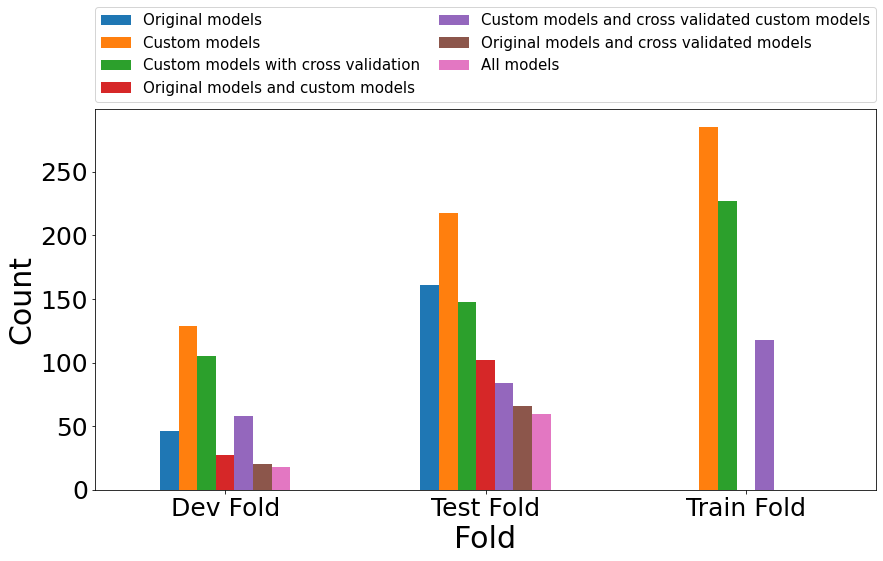

In [60]:
#break down into chart from total errors

def gen_by_dset_counts(df, name):
    counts_by_source = {}
    counts_by_source["Fold"] = name
    counts_by_source ["Original models"] = df[df["conll_2"]].shape[0]
    counts_by_source["Custom models"] = df[df["conll_3"]].shape[0]
    counts_by_source["Custom models with cross validation"] = df[df["conll_4"]].shape[0]
    counts_by_source["Original models and custom models"] = df[df["conll_2"] & df["conll_3"]].shape[0]
    counts_by_source["Custom models and cross validated custom models"] = df[df["conll_3"] & df["conll_4"]].shape[0]
    counts_by_source["Original models and cross validated models"] = df[df["conll_2"] & df["conll_4"]].shape[0]
    counts_by_source["All models"] = df[df["conll_2"]& df["conll_3"] & df["conll_4"]].shape[0]
    return counts_by_source

full_model_counts = gen_by_dset_counts(all_labels[all_labels["error_type"] != "None"], name="total")
dev_counts = gen_by_dset_counts(all_labels[(all_labels["error_type"] != "None") & (all_labels["fold"]=='dev')], name="Dev Fold")
test_counts = gen_by_dset_counts(all_labels[(all_labels["error_type"] != "None") & (all_labels["fold"]=='test')], name="Test Fold")
train_counts = gen_by_dset_counts(all_labels[(all_labels["error_type"] != "None") & (all_labels["fold"]=='train')], name="Train Fold")
count_list = [dev_counts, test_counts, train_counts]
df_counts = pd.DataFrame(count_list)
df_counts

plt.figure('a')
ax = df_counts.plot("Fold", ["Original models", "Custom models", "Custom models with cross validation", "Original models and custom models", "Custom models and cross validated custom models","Original models and cross validated models", "All models"], kind="bar")
                 #title = "Errors found by each model, by Fold"
ax.tick_params(axis='both', labelsize=25, labelrotation=0)
ax.set_ylabel('Count', fontsize=30)
ax.set_xlabel('Fold', fontsize=30)
ax.legend(fontsize=15, loc='lower left', ncol=2, borderaxespad=0, mode='expand',
          bbox_to_anchor=(0., 1.02, 1., .102))
if save_figures:
    savefig("Err_distribution_by_document")

# Combine the dev and test sets to generate stats for the figure in the paper
dev_plus_test_counts = {
    k: dev_counts[k] + test_counts[k] for k in dev_counts.keys()
}

# Compute the sections of the Venn diagram
for d in [dev_counts, test_counts, dev_plus_test_counts, train_counts]:
    d["Only custom models"] = (
         d["Custom models"]
         - d["Original models and custom models"] 
         - d["Custom models and cross validated custom models"]
         + d["All models"])
    d["Only original models"] = (
         d["Original models"]
         - d["Original models and custom models"] 
         - d["Original models and cross validated models"]
         + d["All models"])
    d["Only cross validated models"] = (
         d["Custom models with cross validation"]
         - d["Custom models and cross validated custom models"] 
         - d["Original models and cross validated models"]
         + d["All models"])
    d["Only original and custom"] = (
        d["Original models and custom models"]
        - d["All models"]
    )
    d["Only original and cross validated"] = (
        d["Original models and cross validated models"]
        - d["All models"]
    )
    d["Only custom and cross validated"] = (
        d["Custom models and cross validated custom models"]
        - d["All models"]
    )
    
    
print(f"""
Counts for dev set:
{dev_counts}

Counts for test set:
{test_counts}

Counts for dev set + test set:
{dev_plus_test_counts}

Counts for train set:
{train_counts}
"""
)

### Display frequencies for the not_in_gold subset
Currently we don't have enough data from the in gold data sets to be able to generate a meaningful comparison, so we'll stick with the not_In_gold subset for now 

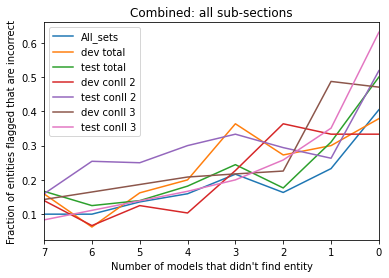

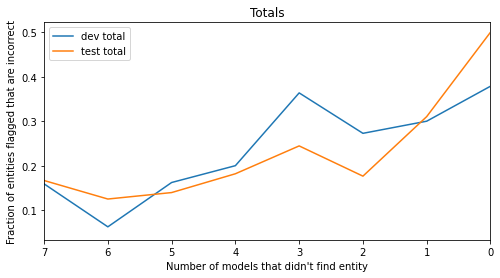

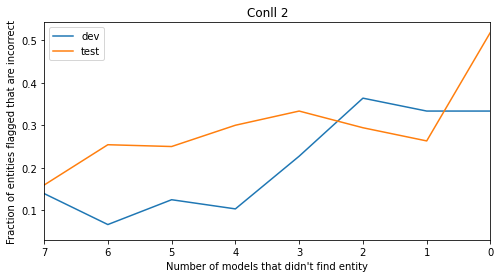

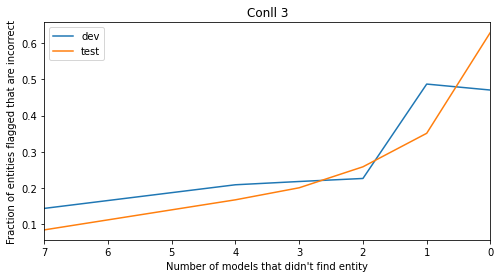

In [28]:
df_total = error_counts_by_num_teams_NG
dev_df_total = df_total[df_total["fold"] == "dev"]
test_df_total = df_total[df_total["fold"] == "test"]

df_conll_2 = error_counts_by_num_teams_conll_2_NG
dev_df_conll_2 = df_conll_2[df_conll_2["fold"] == "dev"]
test_df_conll_2 = df_conll_2[df_conll_2["fold"] == "test"]

df_conll_3 = error_counts_by_num_teams_conll_3_NG
dev_df_conll_3 = df_conll_3[df_conll_3["fold"] == "dev"]
test_df_conll_3 = df_conll_3[df_conll_3["fold"] == "test"]

plt.plot(error_counts_by_num_teams_total_combined ["num_models_missing"], error_counts_by_num_teams_total_combined["fraction_errors"], label="All_sets")

plt.plot(dev_df_total ["num_models_missing"], dev_df_total["fraction_errors"], label="dev total")
plt.plot(test_df_total ["num_models_missing"], test_df_total["fraction_errors"], label="test total")

plt.plot(dev_df_conll_2 ["num_models_missing"], dev_df_conll_2["fraction_errors"], label="dev conll 2")
plt.plot(test_df_conll_2 ["num_models_missing"], test_df_conll_2["fraction_errors"], label="test conll 2")

plt.plot(dev_df_conll_3 ["num_models_missing"], dev_df_conll_3["fraction_errors"], label="dev conll 3")
plt.plot(test_df_conll_3 ["num_models_missing"], test_df_conll_3["fraction_errors"], label="test conll 3")


plt.xlim((7,0))
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Fraction of entities flagged that are incorrect")
plt.title("Combined: all sub-sections")
plt.legend()
plt.rcParams["figure.figsize"] = [14,7]
plt.show()

plt.figure(figsize = [8, 4])
plt.xlim((7,0))
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Fraction of entities flagged that are incorrect")
plt.title("Totals")
plt.plot(dev_df_total ["num_models_missing"], dev_df_total["fraction_errors"], label="dev total")
plt.plot(test_df_total ["num_models_missing"], test_df_total["fraction_errors"], label="test total")
plt.legend()
plt.show()

plt.figure(figsize = [8, 4])
plt.xlim((7,0))
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Fraction of entities flagged that are incorrect")
plt.title("Conll 2")
plt.plot(dev_df_conll_2 ["num_models_missing"], dev_df_conll_2["fraction_errors"], label="dev")
plt.plot(test_df_conll_2 ["num_models_missing"], test_df_conll_2["fraction_errors"], label="test")
plt.legend()
plt.show()

plt.figure(figsize = [8, 4])
plt.xlim((7,0))
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Fraction of entities flagged that are incorrect")
plt.title("Conll 3")
plt.plot(dev_df_conll_3 ["num_models_missing"], dev_df_conll_3["fraction_errors"], label="dev")
plt.plot(test_df_conll_3 ["num_models_missing"], test_df_conll_3["fraction_errors"], label="test")
plt.legend()
plt.show()

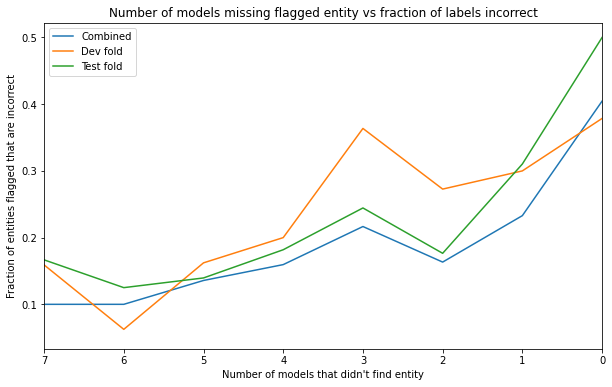

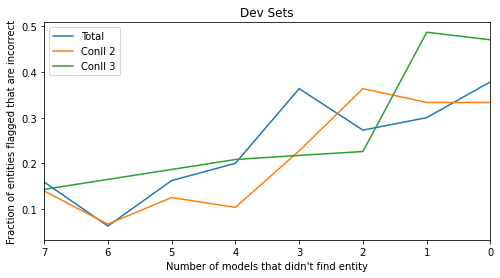

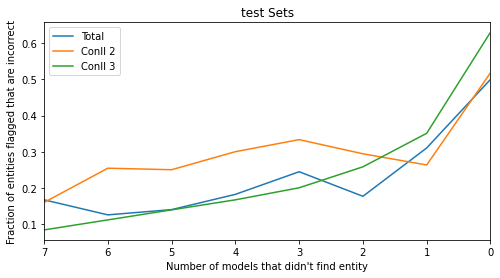

In [29]:
# now look at dev only  and test only

plt.figure(figsize = [10, 6])
plt.xlim((7,0))
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Fraction of entities flagged that are incorrect")
plt.title("Number of models missing flagged entity vs fraction of labels incorrect")
plt.plot(error_counts_by_num_teams_total_combined ["num_models_missing"], error_counts_by_num_teams_total_combined["fraction_errors"], label="Combined")
plt.plot(dev_df_total ["num_models_missing"], dev_df_total ["fraction_errors"], label="Dev fold")
plt.plot(test_df_total ["num_models_missing"], test_df_total ["fraction_errors"], label="Test fold")
plt.legend()
plt.show()

plt.figure(figsize = [8, 4])
plt.xlim((7,0))
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Fraction of entities flagged that are incorrect")
plt.title("Dev Sets")
plt.plot(dev_df_total ["num_models_missing"], dev_df_total ["fraction_errors"], label="Total")
plt.plot(dev_df_conll_2 ["num_models_missing"], dev_df_conll_2["fraction_errors"], label="Conll 2")
plt.plot(dev_df_conll_3 ["num_models_missing"], dev_df_conll_3["fraction_errors"], label="Conll 3")
plt.legend()
plt.show()


plt.figure(figsize = [8, 4])
plt.xlim((7,0))
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Fraction of entities flagged that are incorrect")
plt.title("test Sets")
plt.plot(test_df_total ["num_models_missing"], test_df_total ["fraction_errors"], label="Total")
plt.plot(test_df_conll_2 ["num_models_missing"], test_df_conll_2["fraction_errors"], label="Conll 2")
plt.plot(test_df_conll_3 ["num_models_missing"], test_df_conll_3["fraction_errors"], label="Conll 3")
plt.legend()
plt.show()

## Look at data by error type

In [30]:
#break data into sections based on their tags. Later we will do some similar analysis to above, so maintain other data
# use a dictionary to store the info based on different tags. For now we will analyze each tag seperately 
Error_types = ['Sentence', 'Wrong', 'Token', 'Tag', 'Span', 'Both', 'Missing']
ignore_types = [ 'None']
labels_by_error_type = {}

#all_labels_above_seven = all_labels[all_labels["num_models_missing"] <= 7]

for error_type in Error_types:
    labels_by_error_type[error_type] = all_labels[all_labels["error_type"] == error_type].copy()

# now seperate out into counts for some preliminary analysis

row_list = []
for e_type in Error_types: 
        df = labels_by_error_type[e_type] #make a reference to the dataframe
        
        temp_dict = {}
        temp_dict["error_type"] = e_type
        temp_dict["total"] = df.shape[0]
        temp_dict["dev"] = df[df["fold"] == "dev"].shape[0]
        temp_dict["test"] = df[df["fold"] == "test"].shape[0]
        temp_dict["train"] = df[df["fold"] == "train"].shape[0]
        temp_dict["count_conll_2"] = df[df["conll_2"]].shape[0]
        temp_dict["count_conll_3"] = df[df["conll_3"]].shape[0]
        temp_dict["count_conll_4"] = df[df["conll_4"]].shape[0]
        temp_dict["count_hand"] = df[df["num_models"].isna()].shape[0]
        temp_dict["count_not_in_gold"] = df[(df["subset"] != "in_gold")].shape[0]
        temp_dict["count_in_gold"] = df[(df["subset"] != "not_in_gold")].shape[0]

        row_list.append(temp_dict)
count_errs_by_type = pd.DataFrame(row_list)
print("Total number of errors by type")
display(count_errs_by_type[~count_errs_by_type["error_type"].isin(ignore_types)])
# change to percent incedence 
for i in count_errs_by_type.columns:
    if i !="error_type": 
        count_errs_by_type[i] = count_errs_by_type[i].div(count_errs_by_type[i].sum())*100
count_errs_by_type = count_errs_by_type[~count_errs_by_type["error_type"].isin(ignore_types)]
print("\nError type incedence by percent of total errors correctly flagged ")
count_errs_by_type

Total number of errors by type


,error_type,total,dev,test,train,count_conll_2,count_conll_3,count_conll_4,count_hand,count_not_in_gold,count_in_gold
0,Sentence,217,24,39,154,12,145,88,3,179,136
1,Wrong,147,35,37,75,14,42,8,92,103,76
2,Token,68,12,34,21,12,41,9,13,40,43
3,Tag,637,161,203,273,70,269,81,317,449,405
4,Span,110,27,39,44,30,64,25,14,70,72
5,Both,36,2,19,15,7,26,6,5,25,25
6,Missing,104,27,46,31,39,54,58,25,94,13



Error type incedence by percent of total errors correctly flagged 


,error_type,total,dev,test,train,count_conll_2,count_conll_3,count_conll_4,count_hand,count_not_in_gold,count_in_gold
0,Sentence,16.451857,8.333333,9.352518,25.122349,6.521739,22.620905,32.000000,0.639659,18.645833,17.662338
1,Wrong,11.144807,12.152778,8.872902,12.234910,7.608696,6.552262,2.909091,19.616205,10.729167,9.870130
2,Token,5.155421,4.166667,8.153477,3.425775,6.521739,6.396256,3.272727,2.771855,4.166667,5.584416
3,Tag,48.294162,55.902778,48.681055,44.535073,38.043478,41.965679,29.454545,67.590618,46.770833,52.597403
4,Span,8.339651,9.375000,9.352518,7.177814,16.304348,9.984399,9.090909,2.985075,7.291667,9.350649
5,Both,2.729340,0.694444,4.556355,2.446982,3.804348,4.056162,2.181818,1.066098,2.604167,3.246753
6,Missing,7.884761,9.375000,11.031175,5.057096,21.195652,8.424337,21.090909,5.330490,9.791667,1.688312


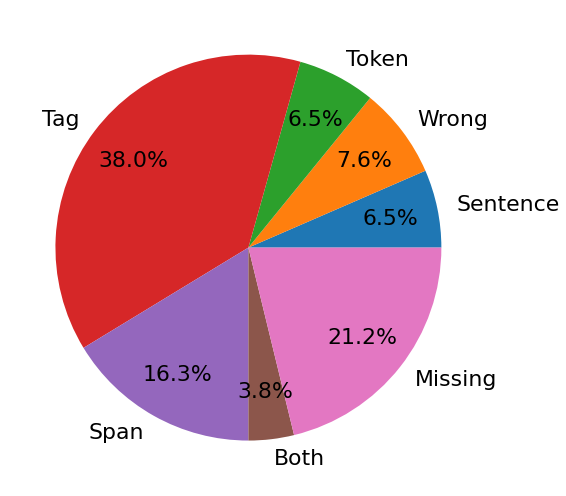

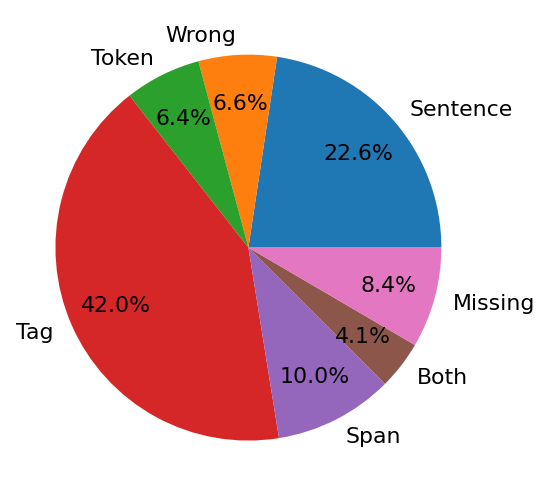

In [31]:
plt.figure()
plt.pie(x=count_errs_by_type["count_conll_2"].array, labels=count_errs_by_type["error_type"].array, autopct='%1.1f%%', pctdistance=.75, labeldistance=1.1, textprops={'fontsize': 22})
plt.tight_layout()
if save_figures:
    savefig("err_distribution_conll_2")
plt.show()

plt.figure()
plt.pie(x=count_errs_by_type["count_conll_3"].array, labels=count_errs_by_type["error_type"].array, autopct='%1.1f%%', pctdistance=.75, labeldistance=1.1, textprops={'fontsize': 22})
plt.tight_layout()
if save_figures:
    savefig("err_distribution_conll_3")
plt.show()

<Figure size 1008x504 with 0 Axes>

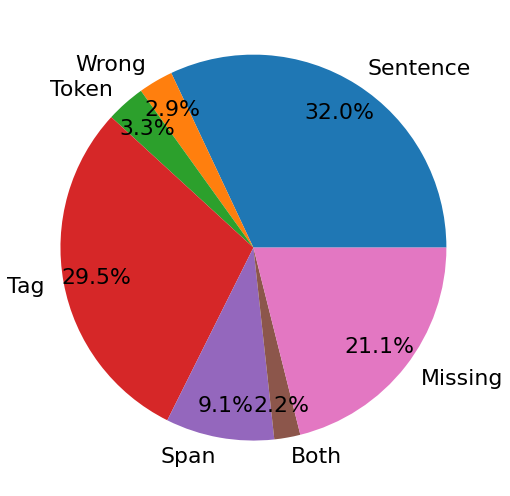

<Figure size 1008x504 with 0 Axes>

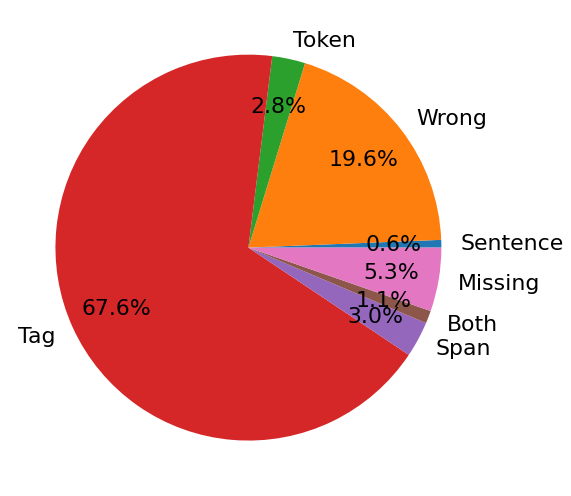

In [32]:
plt.clf()
plt.figure()
plt.pie(x=count_errs_by_type["count_conll_4"].array, labels=count_errs_by_type["error_type"].array, autopct='%1.1f%%', pctdistance=.83, labeldistance=1.1,textprops={'fontsize': 22})
plt.tight_layout()
if save_figures:
    savefig("err_distribution_conll_4")
plt.show()

plt.clf()
plt.figure()
plt.pie(x=count_errs_by_type["count_hand"].array, labels=count_errs_by_type["error_type"].array, autopct='%1.1f%%', pctdistance=.75, labeldistance=1.1,textprops={'fontsize': 22})
plt.tight_layout()
if save_figures:
    savefig("err_distribution_hand")
plt.show()

<AxesSubplot:title={'center':'comparison of error type distribution across subsets'}, xlabel='error_type'>

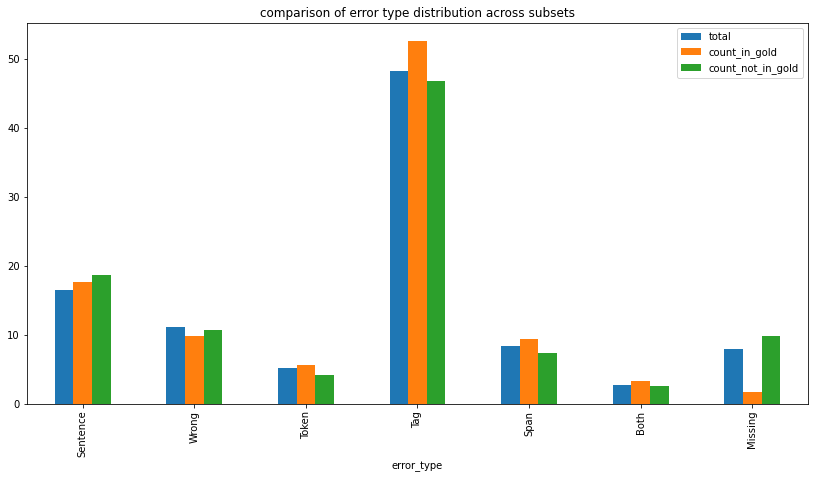

In [33]:
count_errs_by_type.plot("error_type",["total", "count_in_gold","count_not_in_gold"], kind="bar", title="comparison of error type distribution across subsets")

<AxesSubplot:title={'center':'Distribution of errors by error type and by fold'}, xlabel='error_type'>

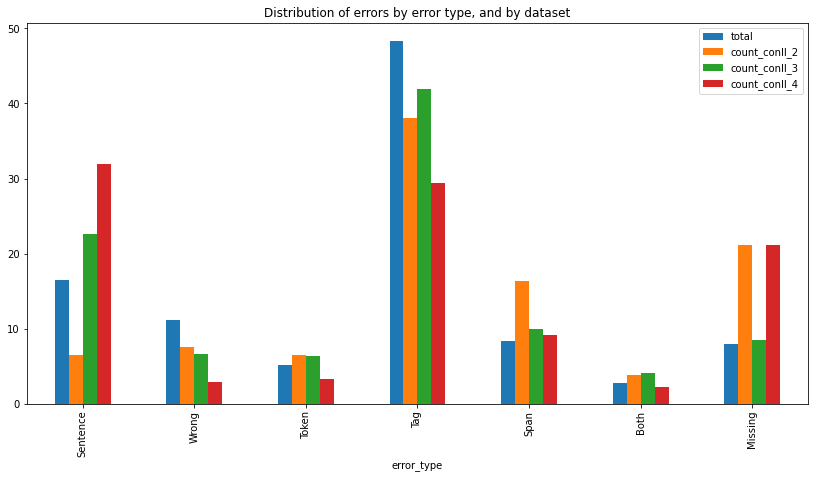

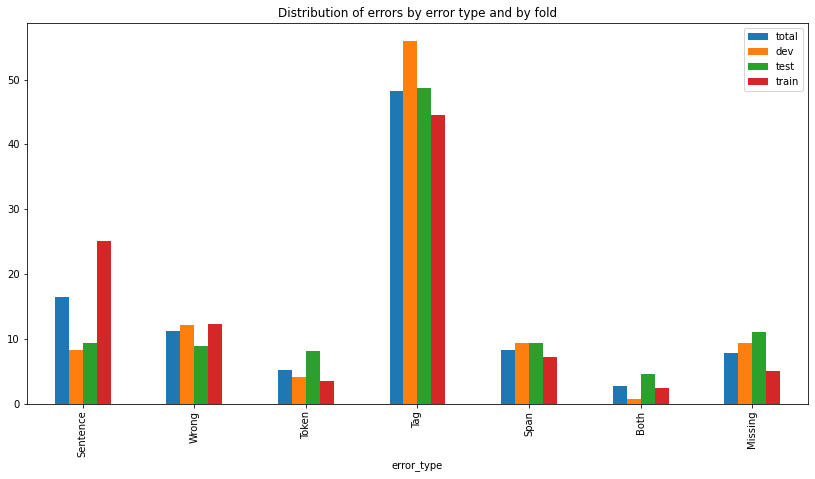

In [34]:
count_errs_by_type.plot("error_type", ['total',"count_conll_2", "count_conll_3", "count_conll_4"], legend=['a', 'b', 'c'], kind="bar", title="Distribution of errors by error type, and by dataset")
#count_errs_by_type.plot("error_type", "total",kind = "bar", title= "Distribution of errors by error type")
count_errs_by_type.plot("error_type", ["total","dev", "test", "train"], kind="bar", title="Distribution of errors by error type and by fold")


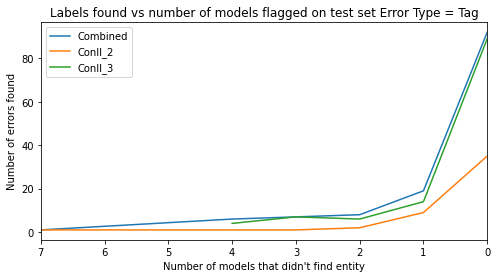

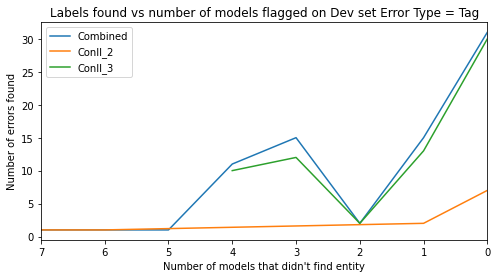

In [35]:
error_type_to_disp = "Tag" 

# a little helper function to improve readability
def get_fold(df,fold):
    return df[df["fold"] ==fold]

data_df = labels_by_error_type[error_type_to_disp] 
data_df_conll_2 = data_df[data_df["conll_2"] &(~data_df["num_models_missing"].isna())]
data_df_conll_3 = data_df[data_df["conll_3"] &(~data_df["num_models_missing"].isna())]

counts_total = make_counts(data_df)

counts_conll_2 = make_counts(data_df_conll_2)
counts_conll_3 = make_counts(data_df_conll_3)

#plot test set
plt.figure(figsize = [8, 4])
plt.xlim((7,0))
plt.title("Labels found vs number of models flagged on test set Error Type = " +error_type_to_disp)
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Number of errors found")
plt.plot(get_fold(counts_total,"test")["num_models_missing"], get_fold(counts_total,"test")["total"], label="Combined")
plt.plot(get_fold(counts_conll_2,"test")["num_models_missing"], get_fold(counts_conll_2,"test")["total"], label="Conll_2")
plt.plot(get_fold(counts_conll_3,"test")["num_models_missing"], get_fold(counts_conll_3,"test")["total"], label="Conll_3")
plt.legend()


#plot dev set
plt.figure(figsize = [8, 4])
plt.xlim((7,0))
plt.title("Labels found vs number of models flagged on Dev set Error Type = " +error_type_to_disp)
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Number of errors found")
plt.plot(get_fold(counts_total,"dev")["num_models_missing"], get_fold(counts_total,"dev")["total"], label="Combined")
plt.plot(get_fold(counts_conll_2,"dev")["num_models_missing"], get_fold(counts_conll_2,"dev")["total"], label="Conll_2")
plt.plot(get_fold(counts_conll_3,"dev")["num_models_missing"], get_fold(counts_conll_3,"dev")["total"], label="Conll_3")
plt.legend()

In [36]:
# show frequency distribution for given document
def count_error_distribution_for_doc(Doc_num, fold):
    counts = []
    for tag in Error_types: 
        df = labels_by_error_type[tag] #make a reference to the dataframe
        df = df[(df["doc_offset"] == Doc_num) & (df["fold"] == fold)]
        
        temp_dict = {}
        temp_dict["error_type"] = tag
        temp_dict["count"] = df.shape[0]
        temp_dict["count_conll_2"] = df[df["conll_2"]].shape[0]
        temp_dict["count_conll_3"] = df[df["conll_3"]].shape[0]
        temp_dict["count_conll_4"] = df[df["conll_4"]].shape[0]
        counts.append(temp_dict)
    return pd.DataFrame(counts) 

count_error_distribution_for_doc(35,"test")

,error_type,count,count_conll_2,count_conll_3,count_conll_4
0,Sentence,0,0,0,0
1,Wrong,0,0,0,0
2,Token,0,0,0,0
3,Tag,0,0,0,0
4,Span,0,0,0,0
5,Both,0,0,0,0
6,Missing,0,0,0,0


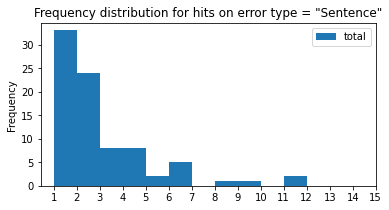

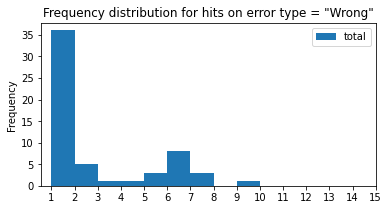

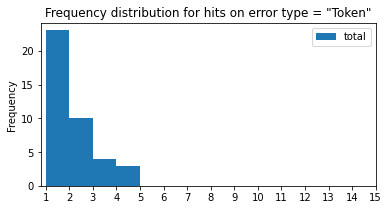

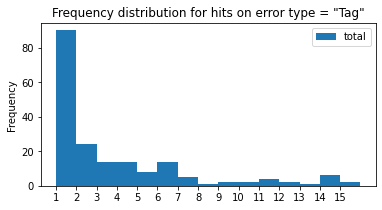

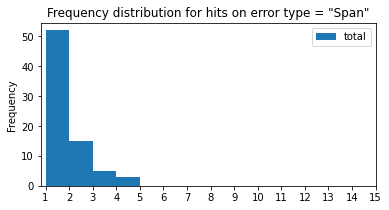

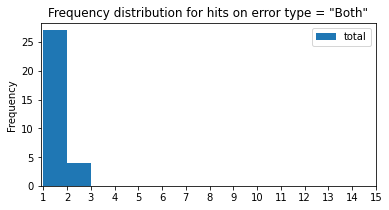

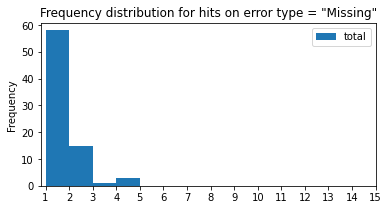

In [37]:
#find histogram of hits for dataset on given error type (may apply multiple times to get different looking data set)
def graph_hit_frequency_for_err_type(error_type):
    df = labels_by_error_type[error_type]
    counts =(df[["doc_offset", "fold"]]
            .groupby(["doc_offset","fold"])
            .aggregate({"doc_offset": "count"})
            .rename(columns={"doc_offset": "total"})
            .reset_index() )
    
    max_val = counts["total"].max()
    counts.drop("doc_offset", axis=1).plot.hist(xticks = range(1,16),bins = max_val-1, figsize = (6,3),
                title = "Frequency distribution for hits on error type = \"" + error_type + "\"")
    return counts; 

frequency_by_err_types = {}
for e_type in Error_types: 
    frequency_by_err_types[e_type] = graph_hit_frequency_for_err_type(e_type)

In [38]:
frequency_by_err_types["Token"]

,doc_offset,fold,total
0,3,test,2
1,15,dev,4
2,27,test,3
3,29,test,2
4,39,dev,1
5,39,test,1
6,54,test,5
7,56,test,2
8,60,dev,1
9,63,test,2


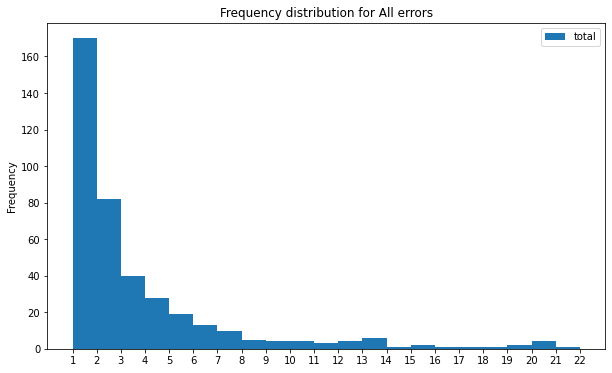

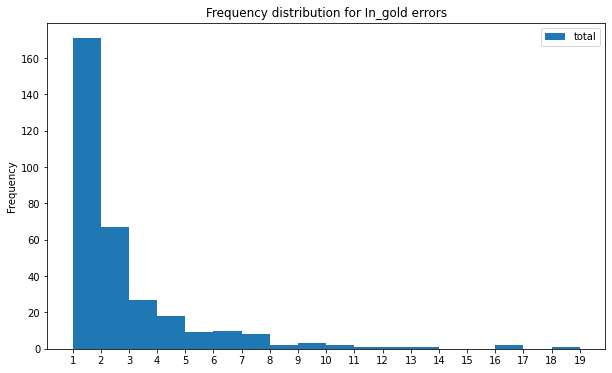

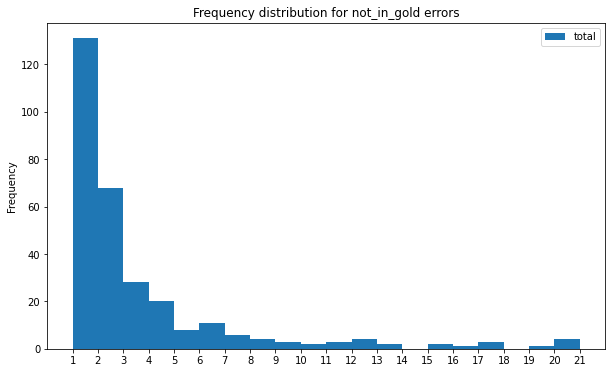

In [39]:
def make_doc_histogram(selection, selection_name):
    df = selection[selection["error_type"] != "None"]
    counts =(df[["doc_offset", "fold"]]
                .groupby(["doc_offset","fold"])
                .aggregate({"doc_offset": "count"})
                .rename(columns={"doc_offset": "total"})
                .reset_index() )
    max_val = counts["total"].max()
    counts.plot("doc_offset","total", kind="hist", xticks= range(1,max_val +1), figsize = (10,6), bins = max_val-1,
                title = "Frequency distribution for " +selection_name  )

make_doc_histogram(all_labels, "All errors")
make_doc_histogram(all_labels_in_gold, "In_gold errors")
make_doc_histogram(all_labels_not_in_gold, "not_in_gold errors")

In [40]:
##print out all_labels dataset as a csv 

ALL_LABELS_OUTPUT_FILE_NAME = os.path.join("..", "corrected_labels", "all_conll_corrections_combined.csv")

write_columns = ["fold", "doc_offset", "corpus_span", "corpus_ent_type", "error_type",
                 "correct_span", "correct_ent_type", "agreeing_models", "notes", "conll_2", "conll_3", "conll_4"]

write_file = all_labels[write_columns].copy()
write_file.loc[:, "hand_labelled"] = write_file["agreeing_models"].isna()
write_file = write_file[write_file.error_type != "None"]

write_file.rename(columns={"conll_2": "Original entrants ensemble", "conll_3": "custom models ensemble", "conll_4": "cross validation ensemble"}, inplace=True)

write_file.to_csv(ALL_LABELS_OUTPUT_FILE_NAME)
print("Done")

Done


In [41]:
write_file

,fold,doc_offset,corpus_span,corpus_ent_type,error_type,correct_span,correct_ent_type,agreeing_models,notes,Original entrants ensemble,custom models ensemble,cross validation ensemble,hand_labelled
4,dev,2,"[122, 129): 'England'",LOC,Tag,"[122, 129): 'England'",ORG,<NA>,Cricket team,False,False,False,True
5,dev,2,"[1354, 1362): 'Scotland'",LOC,Tag,"[1354, 1362): 'Scotland'",ORG,<NA>,NaN,False,False,False,True
7,dev,2,"[235, 244): 'Australia'",LOC,Tag,"[235, 244): 'Australia'",ORG,<NA>,Cricket team,False,False,False,True
9,dev,2,"[525, 533): 'Scotland'",LOC,Tag,"[525, 533): 'Scotland'",ORG,<NA>,Cricket team,False,False,False,True
10,dev,2,"[61, 70): 'Australia'",LOC,Tag,"[61, 70): 'Australia'",ORG,<NA>,Cricket team,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,train,939,"[88, 93): 'Wales'",LOC,Tag,"[88, 93): 'Wales'",ORG,<NA>,Soccer team,False,False,False,True
3648,train,939,"[99, 109): 'San Marino'",LOC,Tag,"[99, 109): 'San Marino'",ORG,<NA>,Soccer team,False,False,False,True
3652,train,944,"[1036, 1042): 'Africa'",LOC,Sentence,"[1030, 1042): 'South Africa'",LOC,<NA>,"Sentence boundary between ""South"" and ""Africa""",False,False,True,True
3653,train,944,"[1030, 1035): 'South'",LOC,Sentence,"[1030, 1042): 'South Africa'",NaN,<NA>,"Sentence boundary between ""South"" and ""Africa""",False,True,False,True


In [42]:
pd.options.display.max_rows = 60
all_labels[(all_labels["error_type"] == "Token") & (all_labels["fold"] == 'test')]

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_2,num_models_missing,agreeing_models,conll_3,dataset,conll_4,hand_labelled
985,<NA>,test,3,<NA>,NaN,Token,"[21, 37): 'SKIING-WORLD CUP'",MISC,"[28, 37): 'WORLD CUP'",MISC,NaN,not_in_gold,False,<NA>,<NA>,False,both,False,True
986,0,test,3,<NA>,NaN,Token,"[21, 37): 'SKIING-WORLD CUP'",MISC,"[28,37)'WORLD CUP'",NaN,CHECK span later,in_gold,False,0,17,True,NaN,False,False
1189,0,test,27,<NA>,NaN,Token,"[565, 573): 'X-DENVER'",MISC,"[567, 573): 'DENVER'",ORG,"split on '-', X"" is an annotation""",in_gold,True,0,16,True,both,False,False
1190,10,test,27,"[565, 573): 'X-DENVER'",ORG,Token,<NA>,<NA>,"[567, 573): 'DENVER'",NaN,"""X-"" prefix is a footnote, meaning ""CLINCHED D...",not_in_gold,True,6,10,False,NaN,False,False
1195,0,test,27,<NA>,NaN,Token,"[889, 900): 'Y-GREEN BAY'",MISC,"[891, 900): 'GREEN BAY'",ORG,"split on '-', Y"" is an annotation""",in_gold,True,0,16,True,both,False,False
1217,0,test,29,<NA>,NaN,Token,"[25, 44): 'FOOTBALL-OHIO STATE'",MISC,"[34, 44): 'OHIO STATE'",ORG,"Need to split on '-' ""FOOTBALL-OHIO""",both,True,0,16,False,NaN,False,False
1218,0,test,29,<NA>,NaN,Token,"[25, 44): 'FOOTBALL-OHIO STATE'",MISC,"[34,44): 'OHIO STATE'",ORG,NaN,in_gold,False,0,17,True,NaN,False,False
1264,<NA>,test,39,<NA>,NaN,Token,"[1158, 1175): 'AbelardoFernandez'",PER,"[1158, 1175): 'Abelardo Fernandez'",PER,"Missing space between ""Abelardo"" and ""Fernandez"".",not_in_gold,False,<NA>,<NA>,False,NaN,False,True
1370,0,test,54,<NA>,NaN,Token,"[1145, 1152): 'Boxmeer'",PER,"[1141, 1152): 'van Boxmeer'",NaN,NaN,both,False,0,17,True,NaN,False,False
1373,0,test,54,<NA>,NaN,Token,"[11, 27): 'INTERVIEW-ZYWIEC'",MISC,"[21, 27): 'ZYWIEC'",ORG,NaN,both,True,0,17,True,both,False,False
